<a href="https://colab.research.google.com/github/alexcrich/Spoon-Knife/blob/main/summer_in_person_2024_contingency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the data and all that good stuff (need to do any time you want to edit/re-run)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the shared folder
shared_folder_path = "/content/drive/My Drive/Levy Lab/Value updating project/behavioral pilot analysis/in person summer 2024"

# List files in the shared folder
import os

# List files in the folder
files = os.listdir(shared_folder_path)
print("Files in the shared folder:")
for file in files:
    print(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in the shared folder:
563_task.csv
564_task.csv
567_task.csv
summer in person 2024 contingency analysis.ipynb


In [ ]:
import os
import pandas as pd

participant_data = {}

for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        participant_id = file_name.split('.')[0]  # Extract participant ID from file name
        file_path = os.path.join(shared_folder_path, file_name)
        # Read the CSV file into a DataFrame
        participant_dfs = pd.read_csv(file_path)
        # Store the DataFrame in the dictionary with participant ID as the key
        participant_data[participant_id] = participant_dfs

# Now participant_data contains data for all participants

#for participant_id, df in participant_data.items():
    #print(f"Participant ID: {participant_id}")
    #print(df)  # Print the current participant's DataFrame


# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Within participants

**Includes:**

1.   Accuracy by Block
2.   Number of Trials in Each Block

1.   Accuracy by Trial with Probabilistic Event and Block Changes
2.   Accuracy by Trial Type (with t-test)

1.   Accuracy by Image Rating (with chi-squared)

## For one participant at a time (specify)

Processing data for participant 593_task
          Image      Image Rating Expectation   Outcome  Response Time  \
0    cantaloupe              like    negative  negative          418.0   
1  celerysticks  strongly_dislike    positive  positive          413.0   
2         sushi     strongly_like    negative  negative          431.0   
3   bakedpotato           dislike    positive  negative          366.0   
4         sushi     strongly_like    negative  negative          756.0   

   Jitter 1  Jitter 2  Correct  Correct (Theoretical)  Probabilistic event  \
0    2701.0       504     True                   True                False   
1    2409.5       708     True                   True                False   
2    2754.5       963     True                   True                False   
3    2525.0       528    False                   True                 True   
4    2156.0       598     True                   True                False   

  Trial type  
0  unaligned  
1  unaligned  


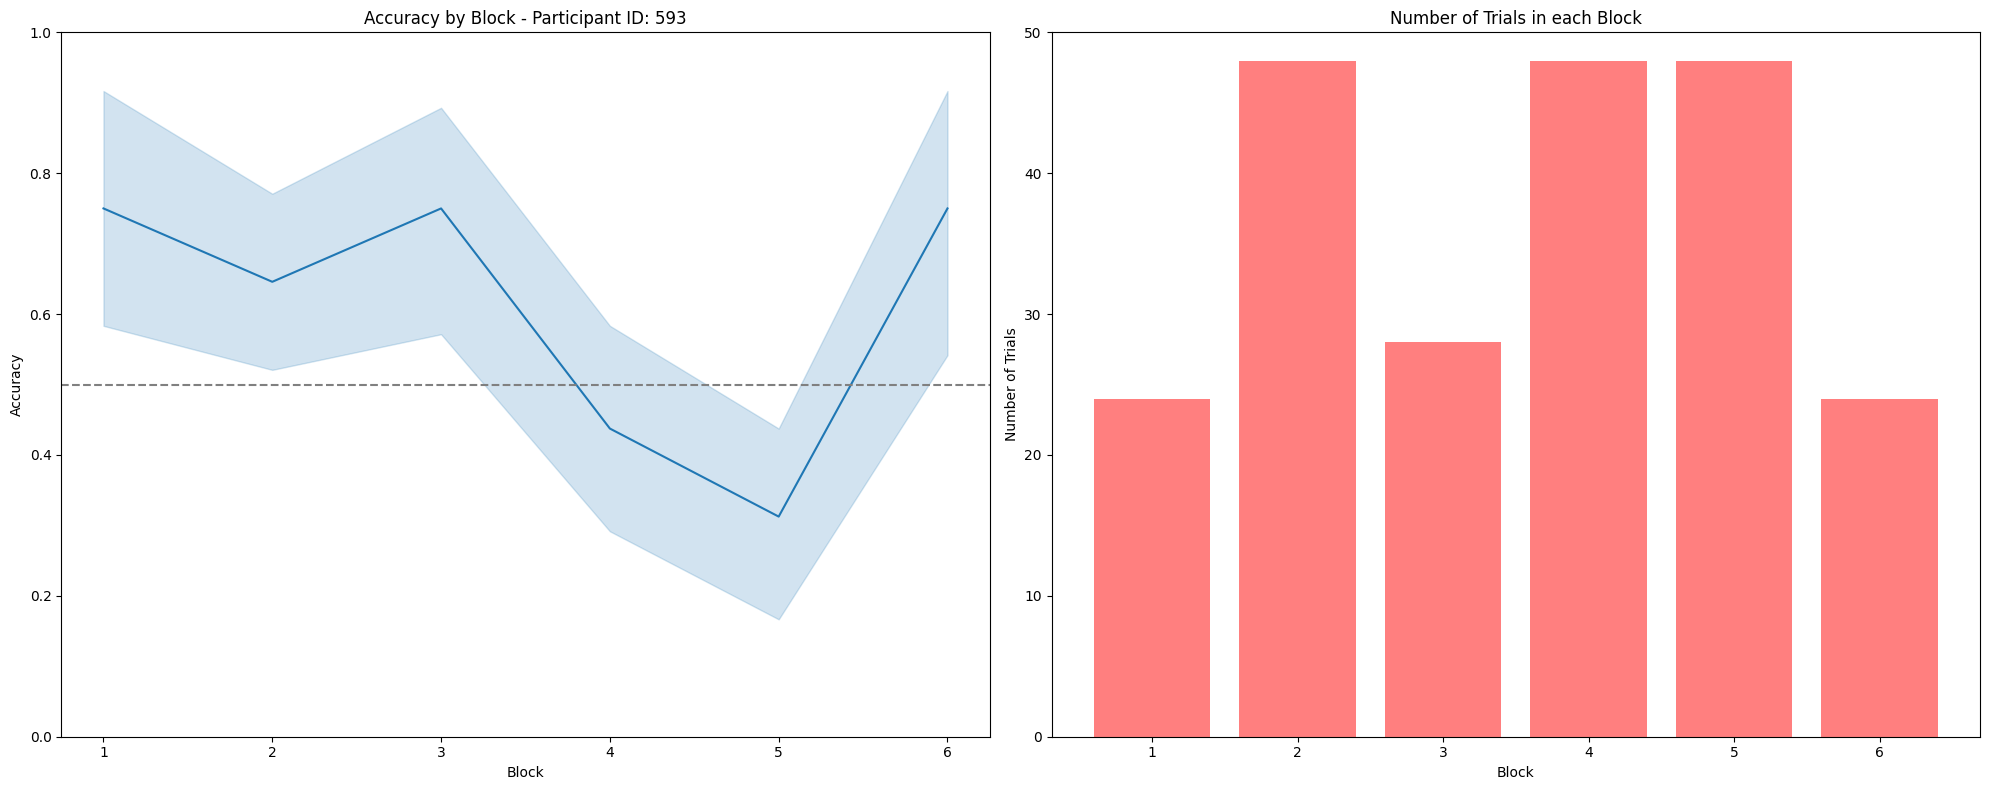

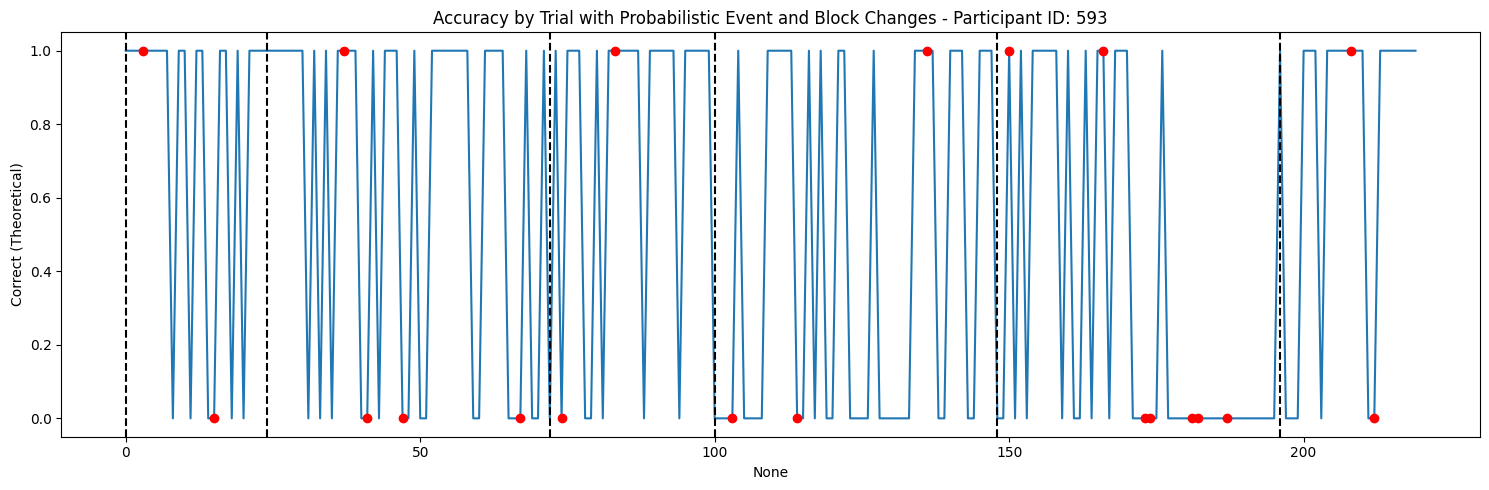

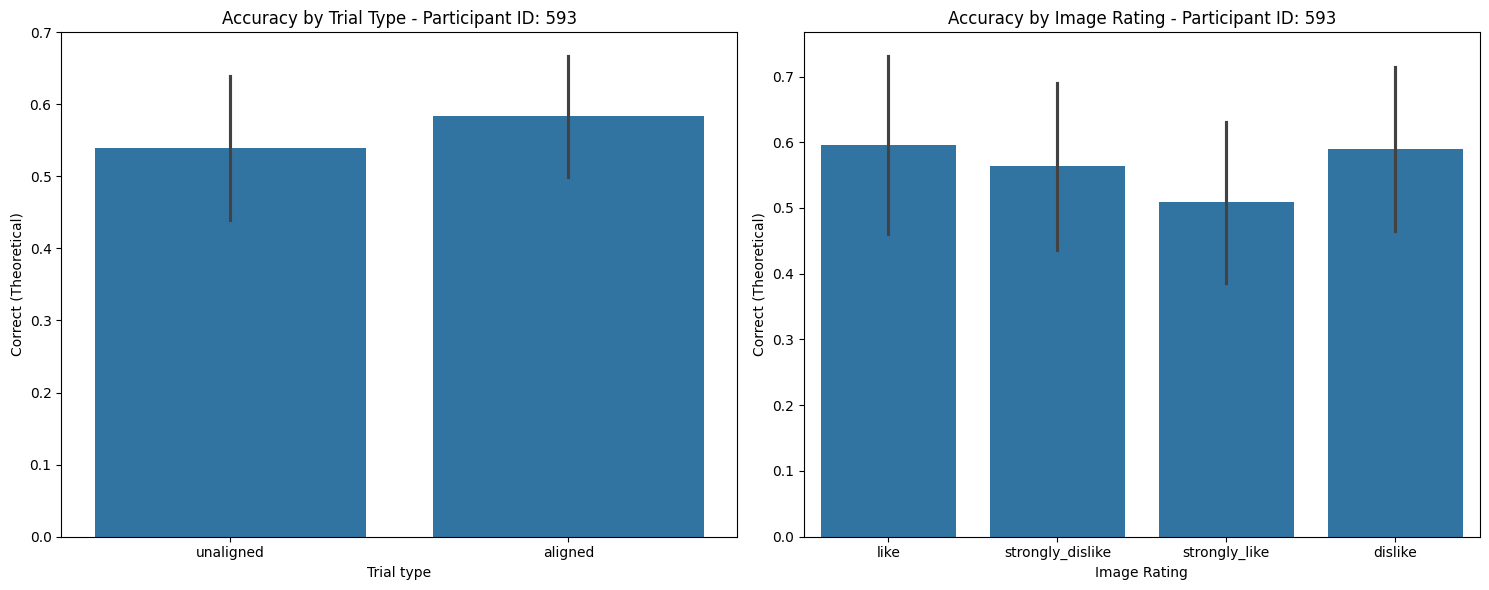

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Define the participant ID you want to process
participant_id = '593_task'  # Replace with the actual participant ID

# Construct the file name for the specified participant
file_name = f'{participant_id}.csv'
file_path = os.path.join(shared_folder_path, file_name)

if os.path.isfile(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Process the DataFrame as needed
    print(f'Processing data for participant {participant_id}')
    print(df.head())  # Example of processing - adjust as needed
else:
    print(f'File for participant {participant_id} does not exist in the folder.')

# Define blocks based on switches in 'Trial type'
df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

# Number of trials in each 'Block'
block_counts = df['Block'].value_counts()

# Accuracy in each 'Block'
block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

# Accuracy per 'Trial type' (aligned and unaligned)
trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()
ttest_p_value_tt = ttest_ind(df[df['Trial type'] == 'aligned']['Correct (Theoretical)'],
                            df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'], nan_policy='omit').pvalue

# Accuracy over the whole task
df['Block Change'] = df['Block'].ne(df['Block'].shift())
df['All Trials'] = 'All Trials'
overall_accuracy = df.groupby(['All Trials', 'Block'])['Correct (Theoretical)'].mean()

# Accuracy as a function of 'Image Rating'
# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output results
print(f"Participant ID: {participant_id.split('_')[0]}")
print("Number of trials in each 'Block':")
print(block_counts)
print("\nAccuracy in each 'Block':")
print(block_accuracy)
print("\nAccuracy per 'Trial type' (aligned and unaligned):")
print(trial_type_accuracy)
print(f"t-test p-value for 'Trial type': {ttest_p_value_tt}")
print("\nAccuracy over the whole task:")
print(overall_accuracy)
print("\nAccuracy as a function of 'Image Rating':")
print(df.groupby('Image Rating')['Correct (Binary)'].mean())
print(f"Chi-squared p-value for 'Image Rating': {p:.15f}")
print("Data for Chi-squared test:")
print(contingency_table)


# Visualization

# Create a 1x2 figure for Accuracy by Block and Number of trials in each Block
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy by Block
sns.lineplot(x='Block', y='Correct (Theoretical)', data=df, ax=axs[0])
axs[0].set_ylabel('Accuracy')
axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
axs[0].set_title(f"Accuracy by Block - Participant ID: {participant_id.split('_')[0]}")

# Number of trials in each Block
sorted_block_counts = block_counts.reindex(sorted(block_counts.index))
axs[1].bar(sorted_block_counts.index, sorted_block_counts, color='r', alpha=0.5)
axs[1].set_ylabel('Number of Trials')
axs[1].set_xlabel('Block')
axs[1].set_ylim(0, 50)  # Set y-axis limits to 0-50
axs[1].set_title('Number of Trials in each Block')

plt.tight_layout()
plt.show()

# Accuracy by Trial with Probabilistic Event and Block Changes
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='Correct (Theoretical)', data=df)
for i, event in enumerate(df['Probabilistic event']):
    if event:
        plt.plot(i, df.loc[i, 'Correct (Theoretical)'], 'ro')
for i, change in enumerate(df['Block Change']):
    if change:
        plt.axvline(x=i, linestyle='--', color='k')
plt.title(f"Accuracy by Trial with Probabilistic Event and Block Changes - Participant ID: {participant_id.split('_')[0]}")
plt.tight_layout()
plt.show()

# Accuracy by Trial Type and Image Rating
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy by Trial Type
sns.barplot(x='Trial type', y='Correct (Theoretical)', data=df, ax=axs[0])
axs[0].set_title(f"Accuracy by Trial Type - Participant ID: {participant_id.split('_')[0]}")
if ttest_p_value_tt < 0.05:
    height = max(df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
    axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
    axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt:.3f}', ha='center', va='bottom')

# Accuracy by Image Rating
sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=df, ax=axs[1])
axs[1].set_title(f"Accuracy by Image Rating - Participant ID: {participant_id.split('_')[0]}")
if p < 0.05:
    height = max(df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
    axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
    axs[1].text(1.5, height + 0.01, f'p={p:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


###Changing the learning criterion for one participant: last 5 trials correct = switch

Last 5 consecutive correct trials found at index: [18, 19, 20, 21, 22]
Last 5 consecutive correct trials found at index: [48, 49, 50, 51, 52]
Last 5 consecutive correct trials found at index: [91, 92, 93, 94, 95]
Last 5 consecutive correct trials found at index: [152, 153, 154, 155, 156]
Last 5 consecutive correct trials found at index: [178, 179, 180, 181, 182]
Last 5 consecutive correct trials found at index: [236, 237, 238, 239, 240]


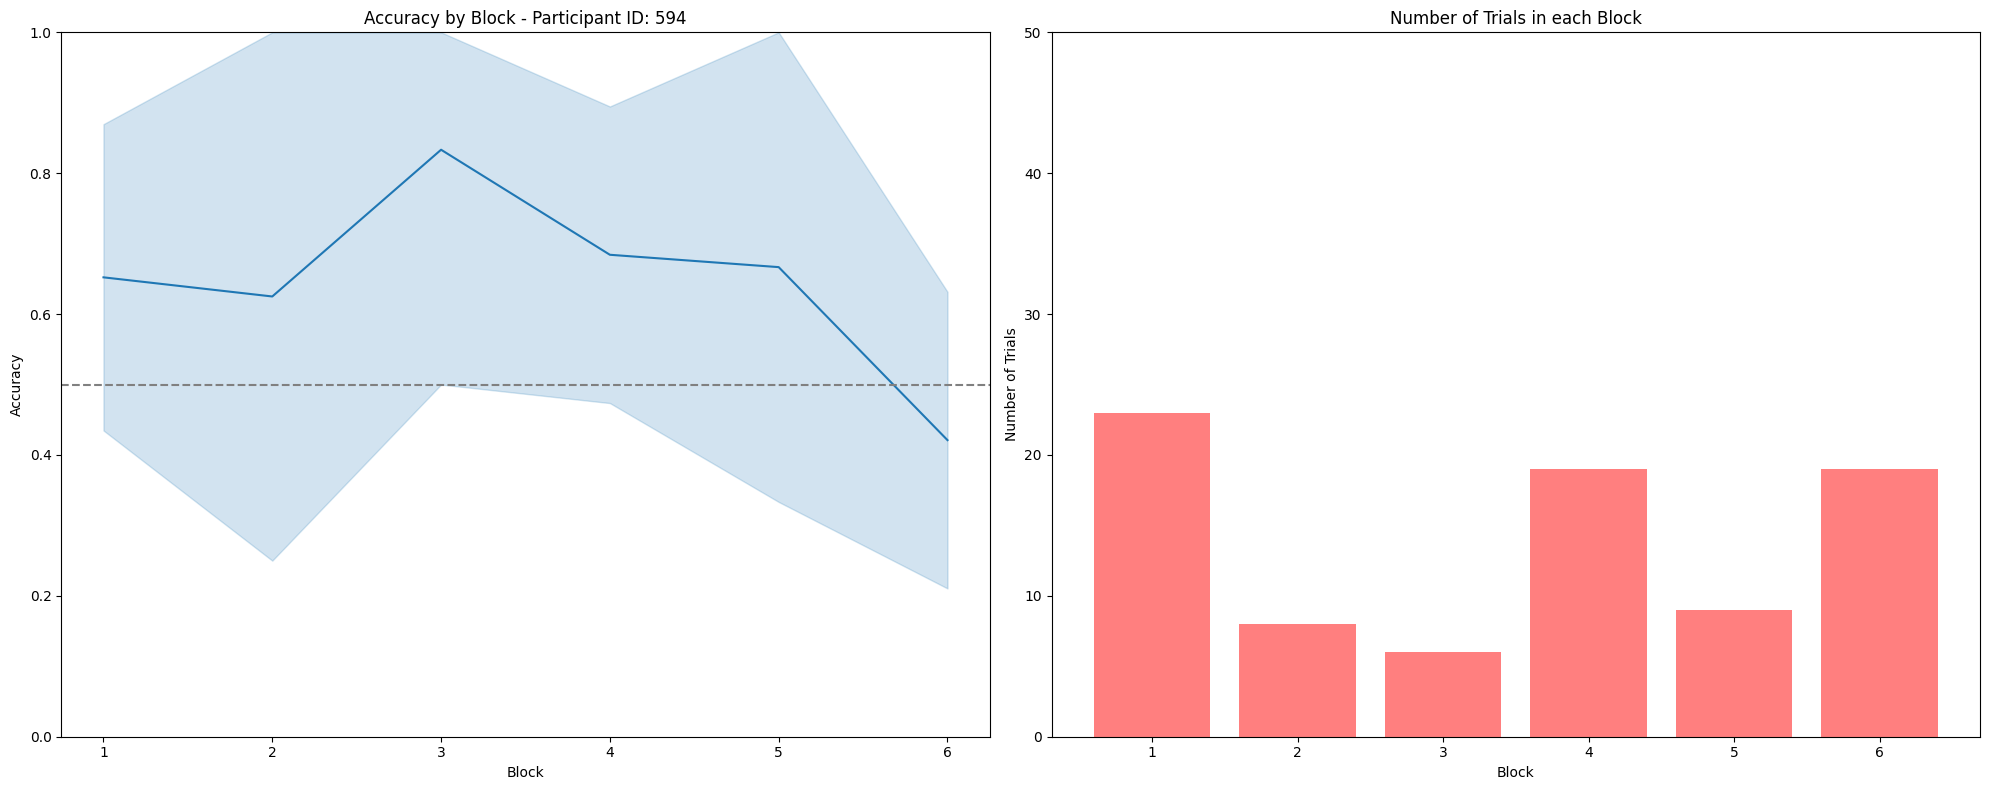

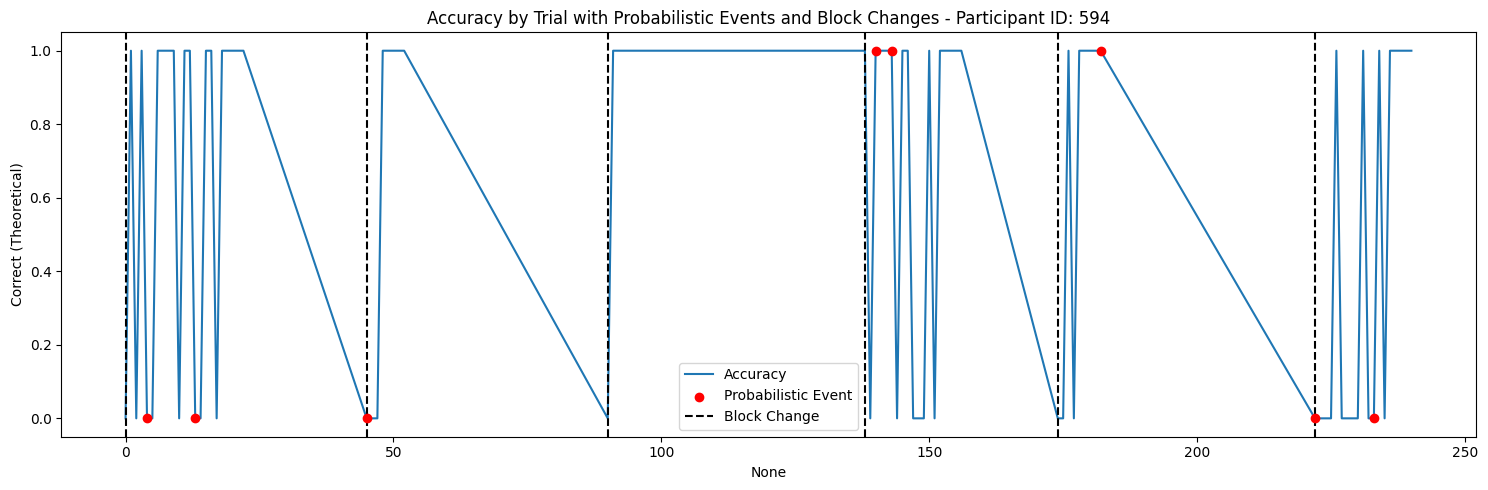

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the participant ID you want to process
participant_id = '594_task'  # Replace with the actual participant ID

# Construct the file name for the specified participant
file_name = f'{participant_id}.csv'
file_path = os.path.join(shared_folder_path, file_name)

if os.path.isfile(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
else:
    print(f'File for participant {participant_id} does not exist in the folder.')

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

# Identify blocks based on trial type changes (aligned/unaligned)
df['Block'] = (df['Trial type'] != df['Trial type'].shift()).cumsum()

# Initialize a list to store the indices of trials to keep
trials_to_keep = []

# Loop through each block to find the last 5 consecutive correct trials
for block_num in df['Block'].unique():
    block_data = df[df['Block'] == block_num]

    # Check for the last sequence of 5 consecutive correct trials
    for i in range(len(block_data) - 4):
        if block_data.iloc[i:i+5]['Correct (Binary)'].sum() == 5:
            print(f"Last 5 consecutive correct trials found at index: {block_data.index[i:i+5].tolist()}")
            # Keep all trials up to and including the 5th correct trial in the sequence
            trials_to_keep.extend(block_data.index[:i+5])
            break
    else:
        # If no sequence of 5 consecutive correct trials is found, keep the entire block
        trials_to_keep.extend(block_data.index)

# Filter the dataframe to only include the selected trials
df_filtered = df.loc[trials_to_keep]

# Re-assign blocks to ensure they are correctly identified
df_filtered['Block'] = (df_filtered['Trial type'] != df_filtered['Trial type'].shift()).cumsum()

# Check if you have a 'Probabilistic event' column or generate a dummy one
if 'Probabilistic event' not in df_filtered.columns:
    # Example: Simulate probabilistic events at random intervals
    df_filtered['Probabilistic event'] = df_filtered.index % 20 == 0  # Replace this with your actual logic

# Mark block changes
df_filtered['Block Change'] = df_filtered['Block'] != df_filtered['Block'].shift(1)

# Visualization

# Create a 1x2 figure for Accuracy by Block and Number of Trials in each Block
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy by Block
sns.lineplot(x='Block', y='Correct (Theoretical)', data=df_filtered, ax=axs[0])
axs[0].set_ylabel('Accuracy')
axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
axs[0].set_title(f"Accuracy by Block - Participant ID: {participant_id.split('_')[0]}")

# Number of trials in each Block
sorted_block_counts = df_filtered['Block'].value_counts().sort_index()
axs[1].bar(sorted_block_counts.index, sorted_block_counts, color='r', alpha=0.5)
axs[1].set_ylabel('Number of Trials')
axs[1].set_xlabel('Block')
axs[1].set_ylim(0, 50)  # Set y-axis limits to 0-50
axs[1].set_title('Number of Trials in each Block')

plt.tight_layout()
plt.show()

# Accuracy by Trial with Probabilistic Events and Block Changes
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_filtered.index, y='Correct (Theoretical)', data=df_filtered, label='Accuracy')

# Plot Probabilistic Events
event_indices = df_filtered.index[df_filtered['Probabilistic event']]
plt.scatter(event_indices, df_filtered.loc[event_indices, 'Correct (Theoretical)'],
            color='red', label='Probabilistic Event', zorder=5)

# Plot Block Changes
block_change_indices = df_filtered.index[df_filtered['Block Change']]
for x in block_change_indices:
    plt.axvline(x=x, linestyle='--', color='k', label='Block Change' if x == block_change_indices[0] else "")

plt.title(f"Accuracy by Trial with Probabilistic Events and Block Changes - Participant ID: {participant_id.split('_')[0]}")
plt.legend()
plt.tight_layout()
plt.show()


###Changing the learning criterion for one participant: last 10 trials 75% correct = switch

75% correct trials found in the last 10 trials at index: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
75% correct trials found in the last 10 trials at index: [46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
75% correct trials found in the last 10 trials at index: [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
75% correct trials found in the last 10 trials at index: [149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
75% correct trials found in the last 10 trials at index: [187, 188, 189, 190, 191, 192, 193, 194, 195, 196]
75% correct trials found in the last 10 trials at index: [233, 234, 235, 236, 237, 238, 239, 240, 241, 242]


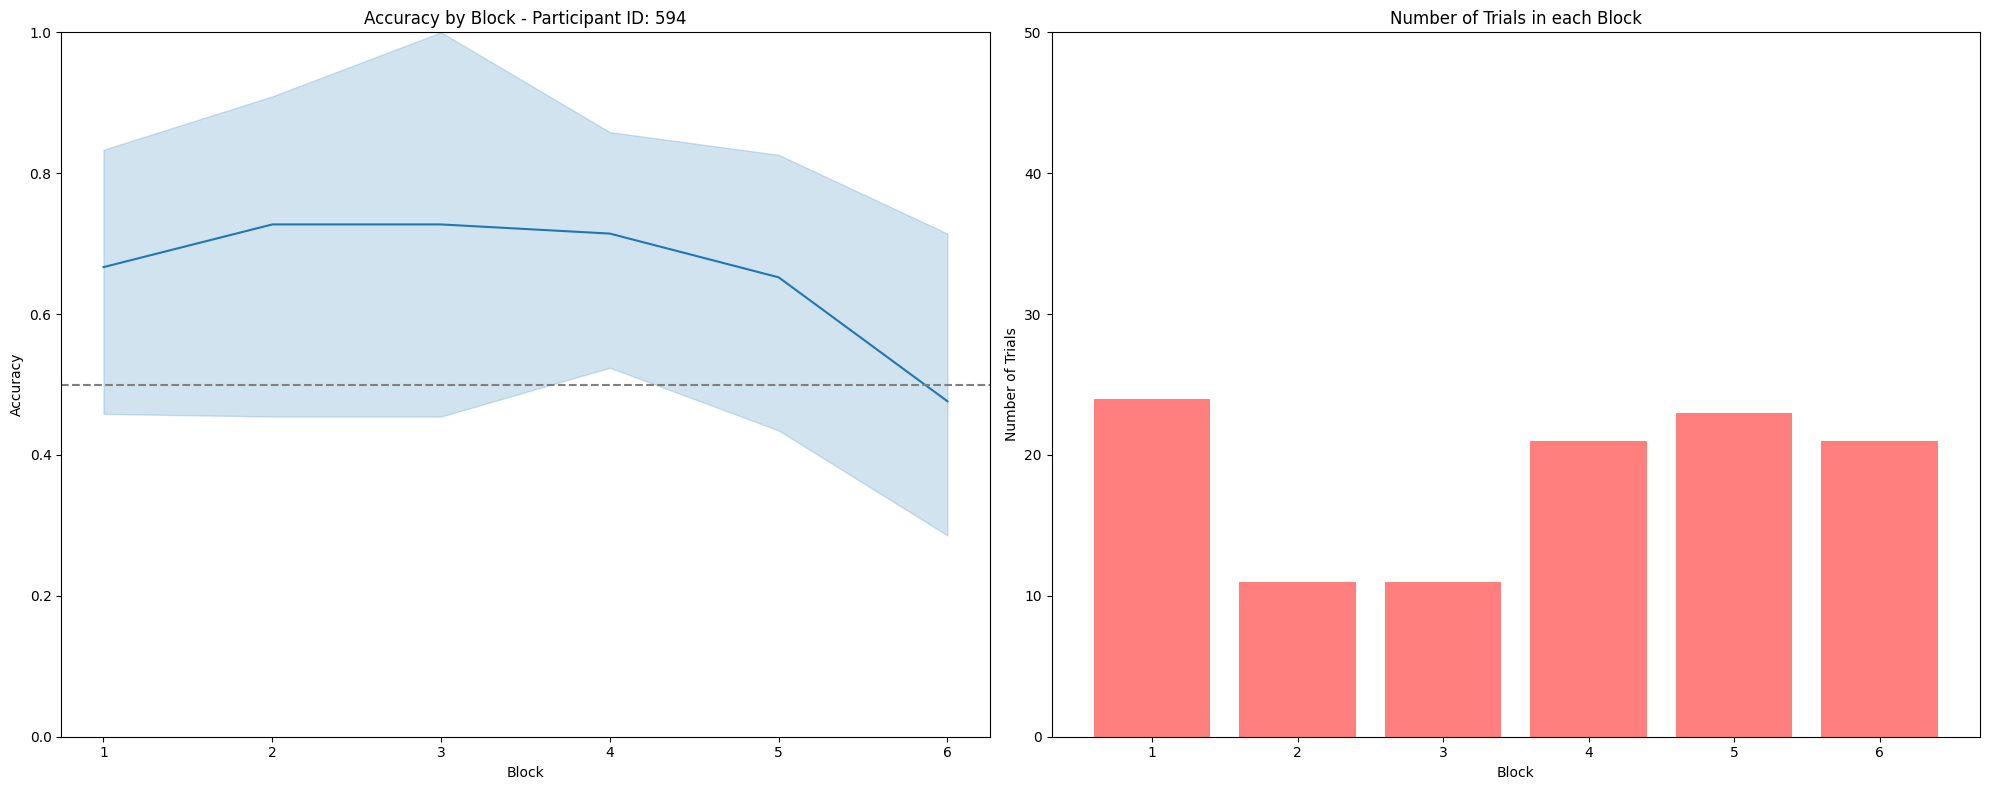

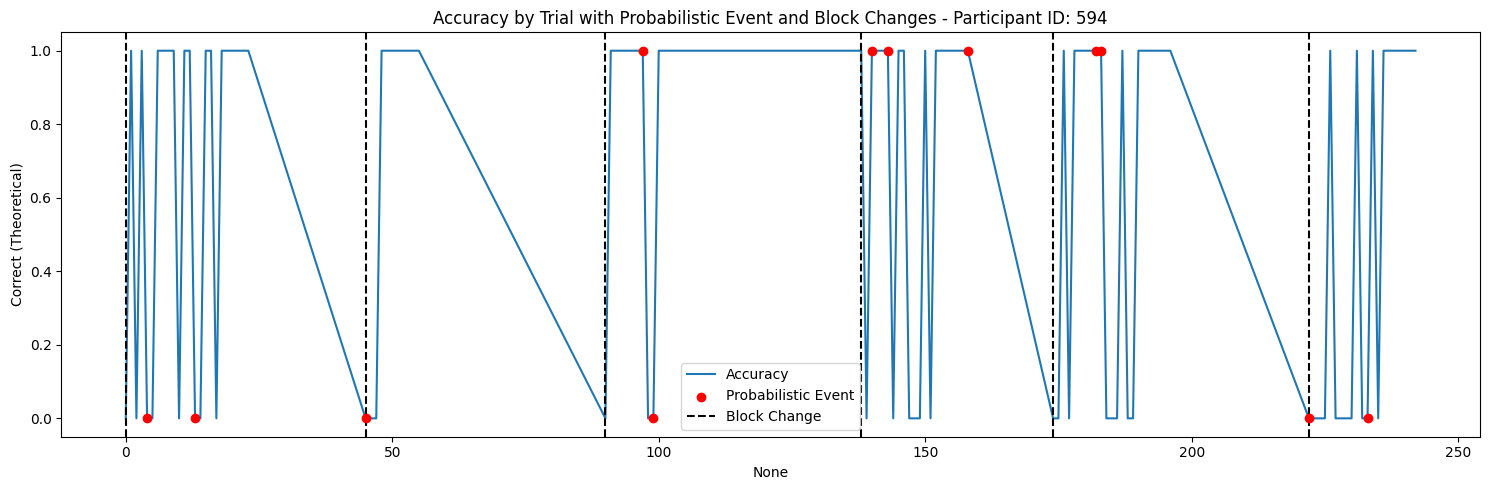

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the participant ID you want to process
participant_id = '594_task'  # Replace with the actual participant ID

# Construct the file name for the specified participant
file_name = f'{participant_id}.csv'
file_path = os.path.join(shared_folder_path, file_name)

if os.path.isfile(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
else:
    print(f'File for participant {participant_id} does not exist in the folder.')

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

# Identify blocks based on trial type changes (aligned/unaligned)
df['Block'] = (df['Trial type'] != df['Trial type'].shift()).cumsum()

# Initialize a list to store the indices of trials to keep
trials_to_keep = []

# Loop through each block to find when 75% of the last 10 trials are correct
for block_num in df['Block'].unique():
    block_data = df[df['Block'] == block_num]

    # Loop through the block data to find the end of the block based on the 75% criterion
    for i in range(len(block_data) - 9):
        last_10_trials = block_data.iloc[i:i+10]['Correct (Binary)']
        if last_10_trials.mean() >= 0.75:
            print(f"75% correct trials found in the last 10 trials at index: {block_data.index[i:i+10].tolist()}")
            # Keep all trials up to and including the 10th trial in the sequence
            trials_to_keep.extend(block_data.index[:i+10])
            break
    else:
        # If no 75% correct trials are found, keep the entire block
        trials_to_keep.extend(block_data.index)

# Filter the dataframe to only include the selected trials
df_filtered = df.loc[trials_to_keep]

# Re-assign blocks to ensure they are correctly identified
df_filtered['Block'] = (df_filtered['Trial type'] != df_filtered['Trial type'].shift()).cumsum()

# Check if you have a 'Probabilistic event' column or generate a dummy one
# If 'Probabilistic event' column is not in your data, create one for demonstration purposes
if 'Probabilistic event' not in df_filtered.columns:
    # Example: Simulate probabilistic events at random intervals
    df_filtered['Probabilistic event'] = df_filtered.index % 20 == 0  # Replace this with your actual logic

# Mark block changes
df_filtered['Block Change'] = df_filtered['Block'] != df_filtered['Block'].shift(1)

# Visualization

# Create a 1x2 figure for Accuracy by Block and Number of Trials in each Block
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy by Block
sns.lineplot(x='Block', y='Correct (Theoretical)', data=df_filtered, ax=axs[0])
axs[0].set_ylabel('Accuracy')
axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
axs[0].set_title(f"Accuracy by Block - Participant ID: {participant_id.split('_')[0]}")

# Number of trials in each Block
sorted_block_counts = df_filtered['Block'].value_counts().sort_index()
axs[1].bar(sorted_block_counts.index, sorted_block_counts, color='r', alpha=0.5)
axs[1].set_ylabel('Number of Trials')
axs[1].set_xlabel('Block')
axs[1].set_ylim(0, 50)  # Set y-axis limits to 0-50
axs[1].set_title('Number of Trials in each Block')

plt.tight_layout()
plt.show()

# Accuracy by Trial with Probabilistic Events and Block Changes
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_filtered.index, y='Correct (Theoretical)', data=df_filtered, label='Accuracy')

# Plot Probabilistic Events
event_indices = df_filtered.index[df_filtered['Probabilistic event']]
plt.scatter(event_indices, df_filtered.loc[event_indices, 'Correct (Theoretical)'],
            color='red', label='Probabilistic Event', zorder=5)

# Plot Block Changes
block_change_indices = df_filtered.index[df_filtered['Block Change']]
for x in block_change_indices:
    plt.axvline(x=x, linestyle='--', color='k', label='Block Change' if x == block_change_indices[0] else "")

plt.title(f"Accuracy by Trial with Probabilistic Event and Block Changes - Participant ID: {participant_id.split('_')[0]}")
plt.legend()
plt.tight_layout()
plt.show()

###Changing learning criterion but keeping minumum 20 trials: last 10 trials 75% correct = switch

75% correct trials found in the last 10 trials at index: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
75% correct trials found in the last 10 trials at index: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
75% correct trials found in the last 10 trials at index: [117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
75% correct trials found in the last 10 trials at index: [149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
75% correct trials found in the last 10 trials at index: [187, 188, 189, 190, 191, 192, 193, 194, 195, 196]
75% correct trials found in the last 10 trials at index: [233, 234, 235, 236, 237, 238, 239, 240, 241, 242]


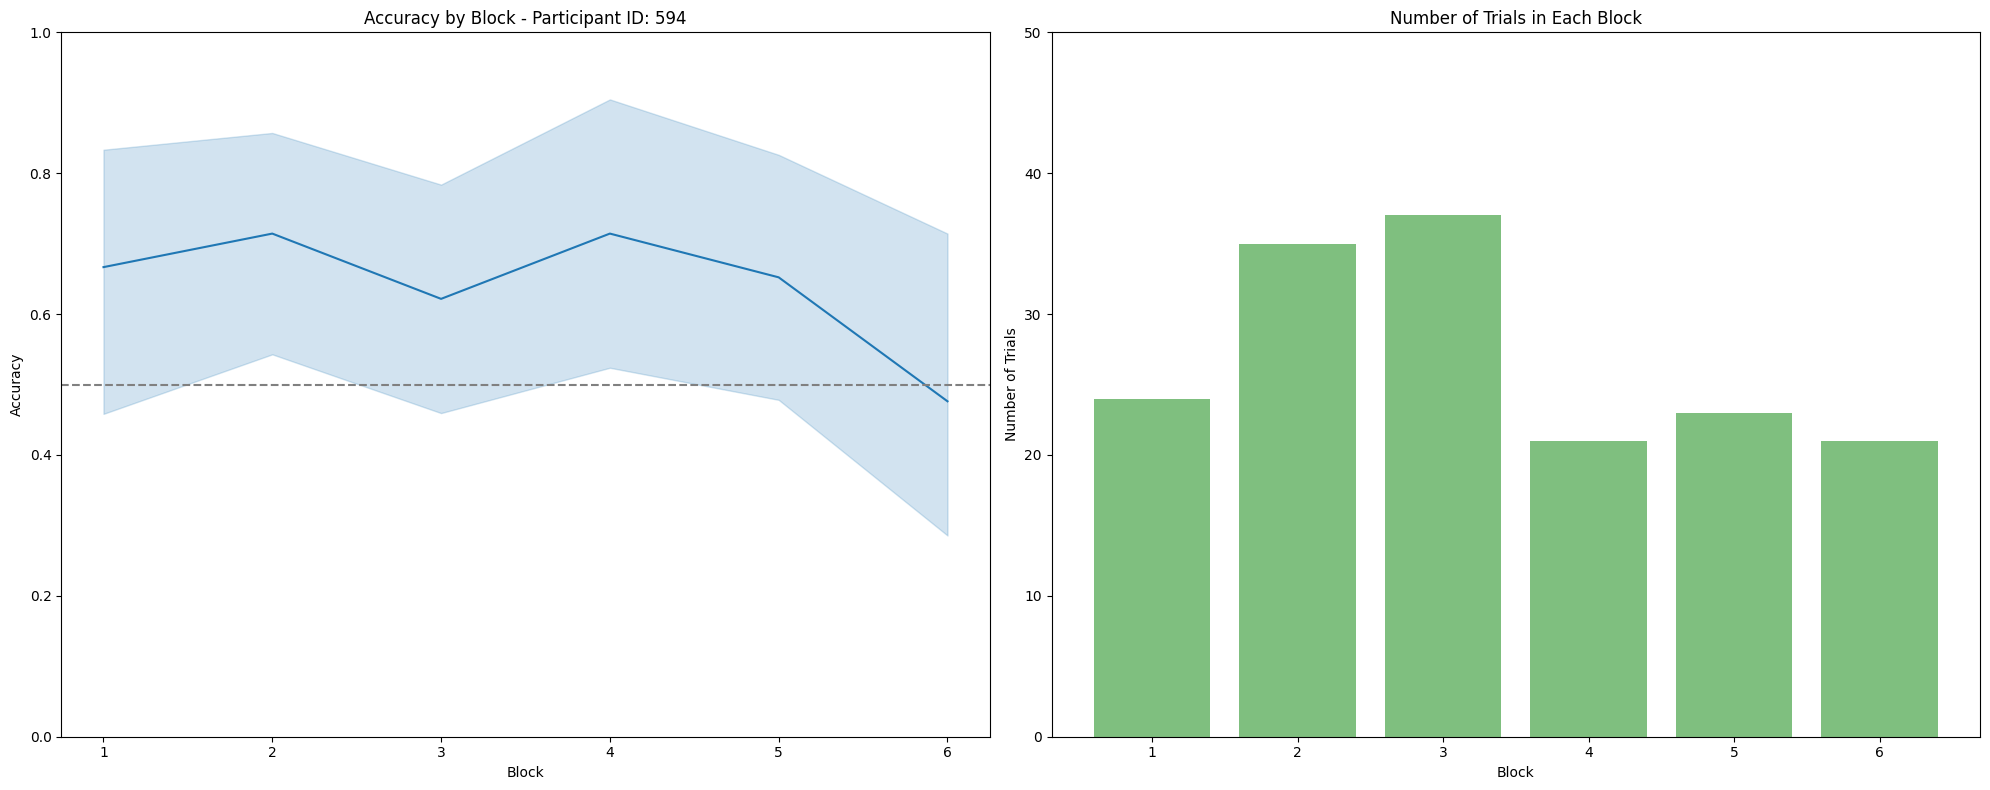

Aligned length of event_indices: 15
Aligned length of correct_values: 15


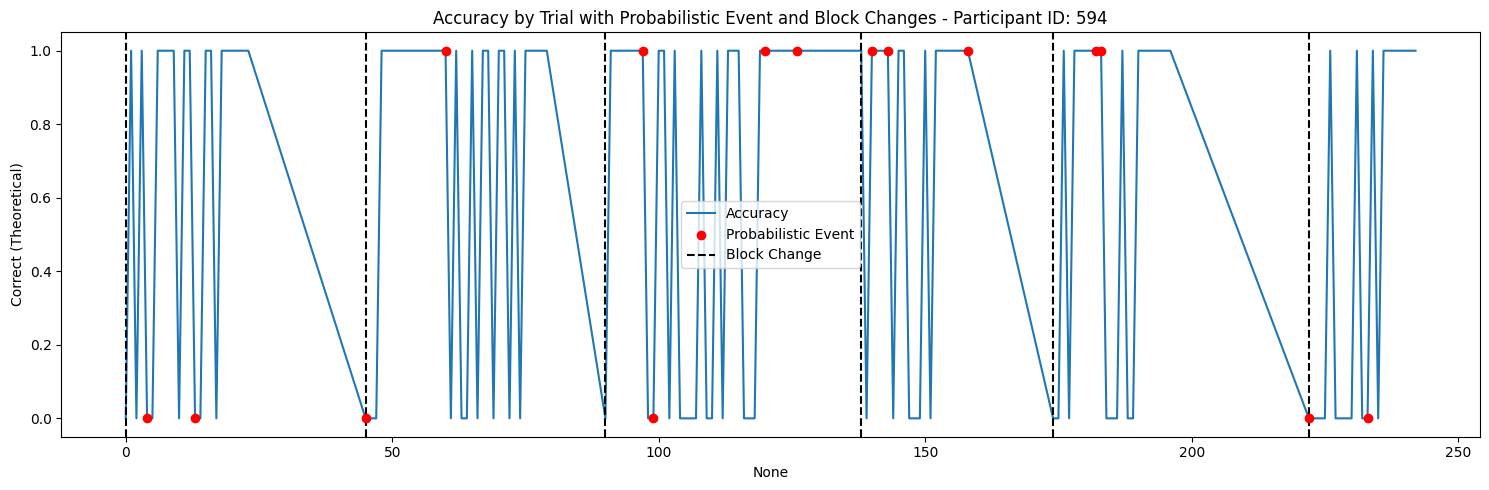

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the participant ID you want to process
participant_id = '594_task'  # Replace with the actual participant ID

# Construct the file name for the specified participant
file_name = f'{participant_id}.csv'
file_path = os.path.join(shared_folder_path, file_name)

if os.path.isfile(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
else:
    print(f'File for participant {participant_id} does not exist in the folder.')

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

# Identify blocks based on trial type changes (aligned/unaligned)
df['Block'] = (df['Trial type'] != df['Trial type'].shift()).cumsum()

# Initialize a list to store the indices of trials to keep
trials_to_keep = []

# Loop through each block to find when 75% of the last 10 trials are correct after at least 20 trials
for block_num in df['Block'].unique():
    block_data = df[df['Block'] == block_num]

    # Ensure the first 20 trials are kept
    trials_to_keep.extend(block_data.index[:20])

    # Start filtering after the 20th trial
    for i in range(10, len(block_data) - 9):  # Start checking from the 11th trial to allow a full window of 10 trials
        last_10_trials = block_data.iloc[i:i+10]['Correct (Binary)']
        if last_10_trials.mean() >= 0.75:
            print(f"75% correct trials found in the last 10 trials at index: {block_data.index[i:i+10].tolist()}")
            # Keep all trials up to and including the 10th trial in the sequence
            trials_to_keep.extend(block_data.index[:i+10])
            break
    else:
        # If no 75% correct trials are found, keep the entire block
        trials_to_keep.extend(block_data.index[20:])

# Filter the dataframe to only include the selected trials
df_filtered = df.loc[sorted(set(trials_to_keep))]  # Use sorted(set()) to avoid duplicates and ensure proper indexing

# Re-assign blocks to ensure they are correctly identified
df_filtered['Block'] = (df_filtered['Trial type'] != df_filtered['Trial type'].shift()).cumsum()

# Check if you have a 'Probabilistic event' column or generate a dummy one
# If 'Probabilistic event' column is not in your data, create one for demonstration purposes
if 'Probabilistic event' not in df_filtered.columns:
    # Example: Simulate probabilistic events at random intervals
    df_filtered['Probabilistic event'] = df_filtered.index % 20 == 0  # Replace this with your actual logic

# Mark block changes
df_filtered['Block Change'] = df_filtered['Block'] != df_filtered['Block'].shift(1)

# Create a 1x2 figure for Accuracy by Block and Number of Trials in Each Block
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy by Block
sns.lineplot(x='Block', y='Correct (Theoretical)', data=df_filtered, ax=axs[0])
axs[0].set_ylabel('Accuracy')
axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
axs[0].set_title(f"Accuracy by Block - Participant ID: {participant_id.split('_')[0]}")

# Number of Trials in Each Block
df_filtered['Trial number'] = df_filtered.groupby('Block').cumcount() + 1
block_sizes = df_filtered.groupby('Block')['Trial number'].max()

axs[1].bar(block_sizes.index, block_sizes, color='g', alpha=0.5)
axs[1].set_ylabel('Number of Trials')
axs[1].set_xlabel('Block')
axs[1].set_ylim(0, 50)  # Adjust y-axis limit to reflect max number of trials
axs[1].set_title('Number of Trials in Each Block')

plt.tight_layout()
plt.show()

# Accuracy by Trial with Probabilistic Events and Block Changes
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_filtered.index, y='Correct (Theoretical)', data=df_filtered, label='Accuracy')

# Get indices where 'Probabilistic event' is True
event_indices = df_filtered.index[df_filtered['Probabilistic event']]
correct_values = df_filtered.loc[event_indices, 'Correct (Theoretical)']

# Debug: Print lengths for verification
print(f"Aligned length of event_indices: {len(event_indices)}")
print(f"Aligned length of correct_values: {len(correct_values)}")

# Check and plot only if lengths match
if len(event_indices) == len(correct_values):
    plt.scatter(event_indices, correct_values, color='red', label='Probabilistic Event', zorder=5)
else:
    print("Error: Mismatch between event_indices and correct_values lengths")

# Plot block changes
block_change_indices = df_filtered.index[df_filtered['Block Change']]
for x in block_change_indices:
    plt.axvline(x=x, linestyle='--', color='k', label='Block Change' if x == block_change_indices[0] else "")

plt.title(f"Accuracy by Trial with Probabilistic Event and Block Changes - Participant ID: {participant_id.split('_')[0]}")
plt.legend()
plt.tight_layout()
plt.show()


## For all participants one by one

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

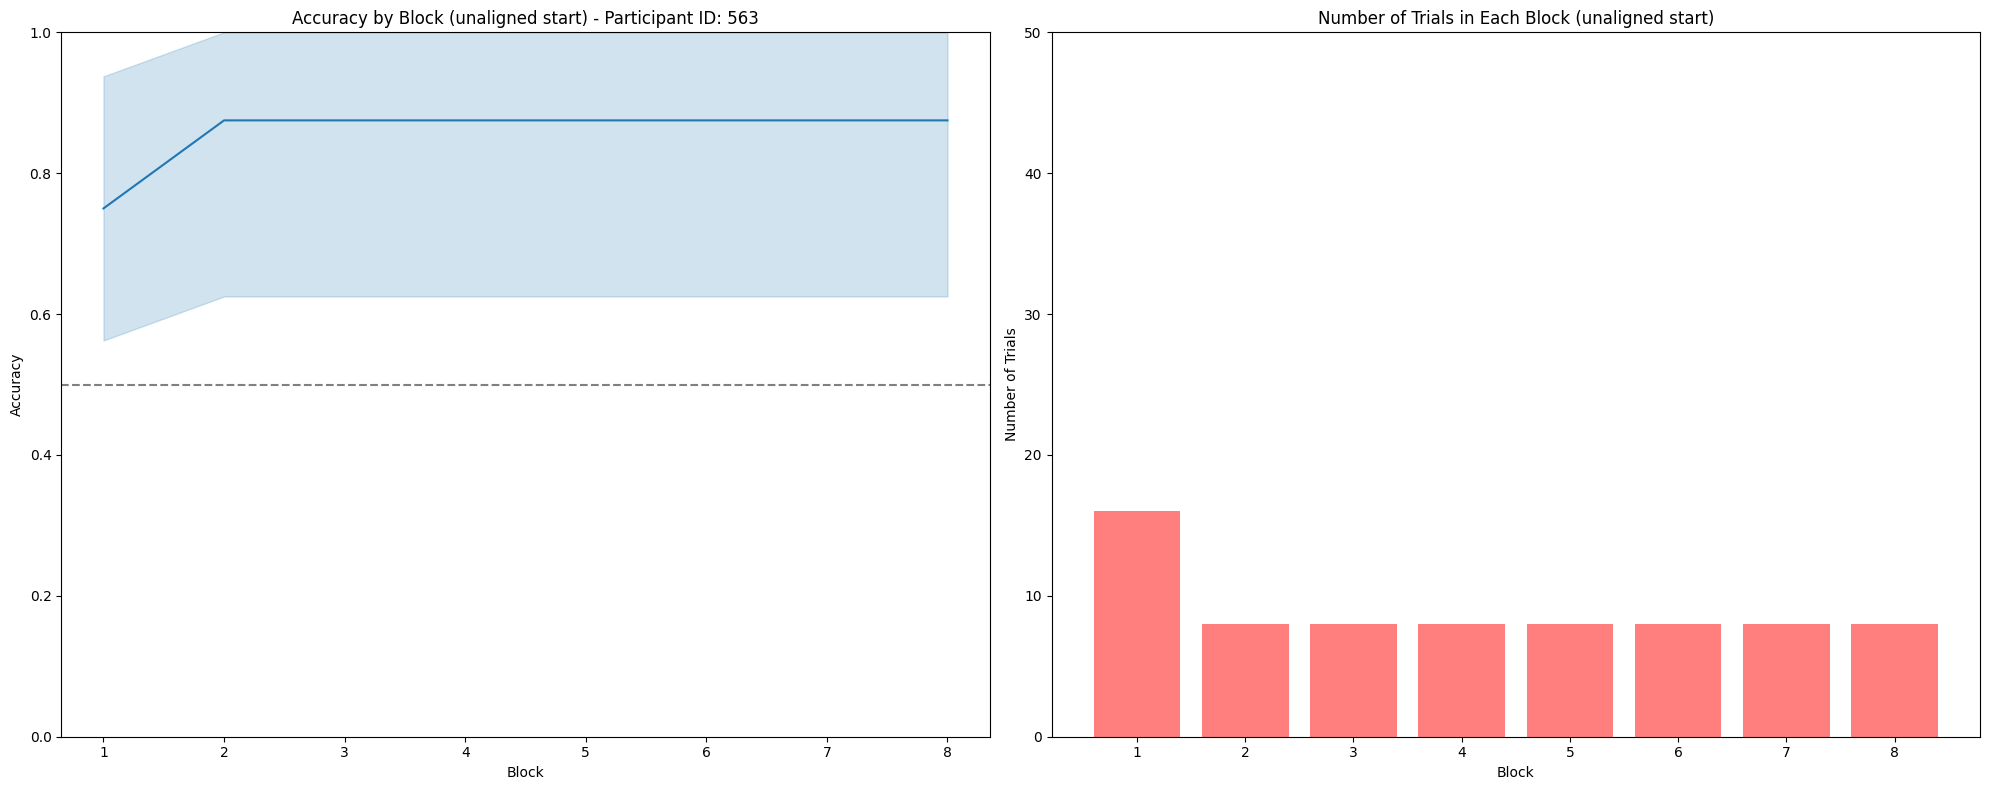

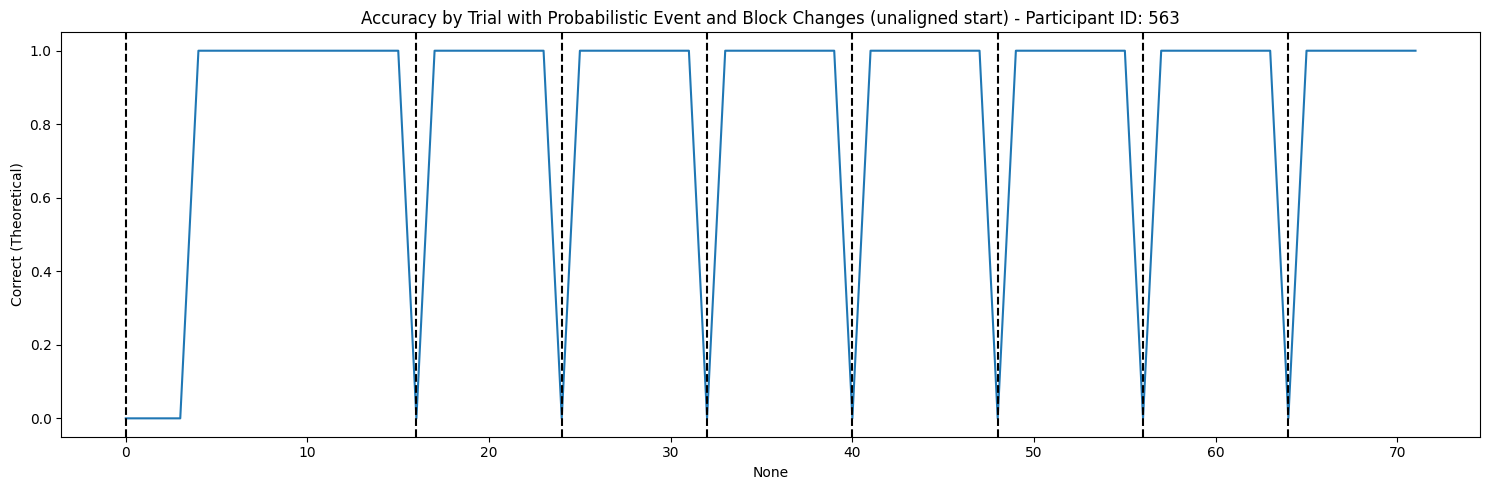

<Figure size 1200x800 with 0 Axes>

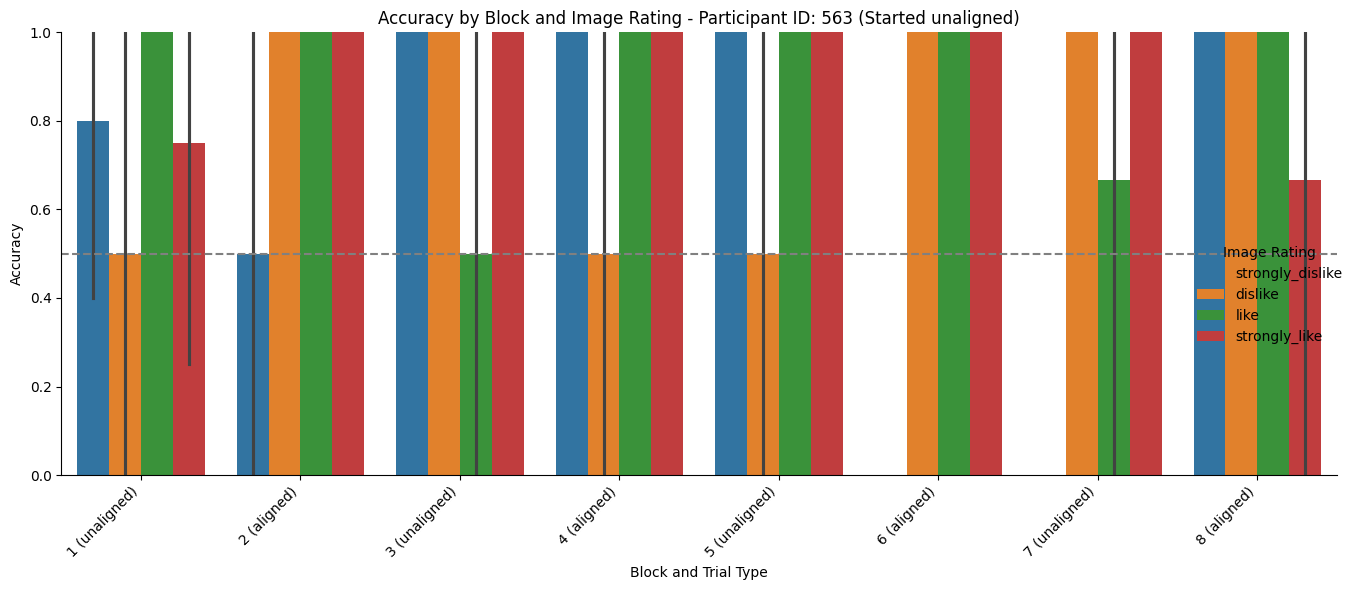

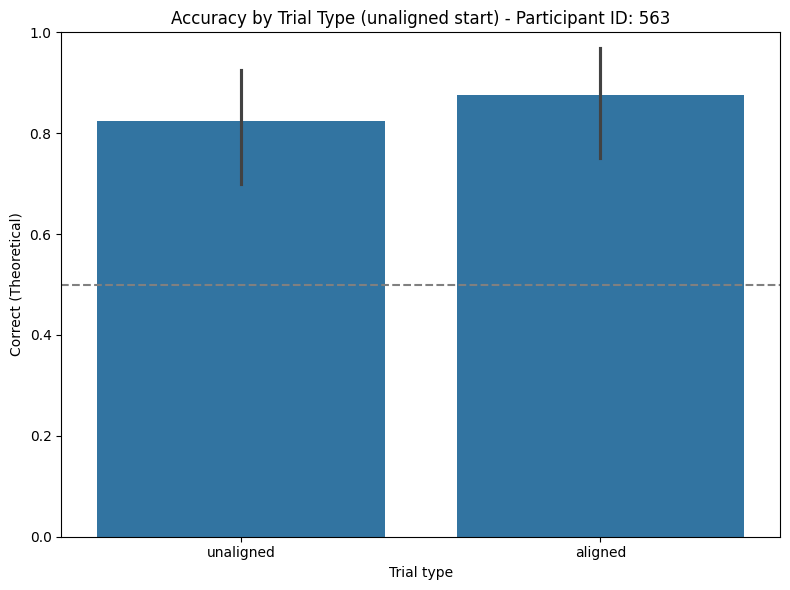

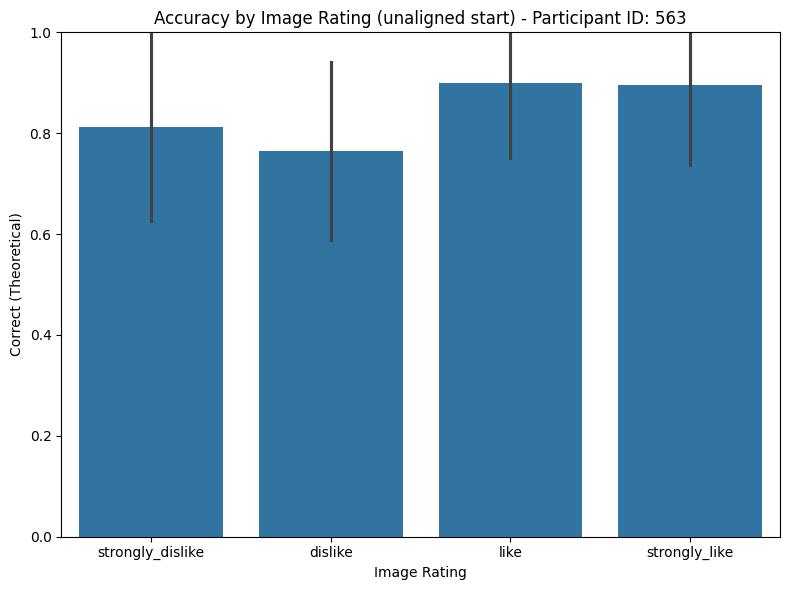

Participant ID: 563
Started with: unaligned
Number of trials in each 'Block':
Block
1    16
2     8
3     8
4     8
5     8
6     8
7     8
8     8
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.750
2    0.875
3    0.875
4    0.875
5    0.875
6    0.875
7    0.875
8    0.875
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.875
unaligned    0.825
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.5643383690553748

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.750
            2        0.875
            3        0.875
            4        0.875
            5        0.875
            6        0.875
            7        0.875
            8        0.875
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.812500
dislike             0.764706
like                0.900000
strongly_lik

<ipython-input-26-66869f9aeb51>:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


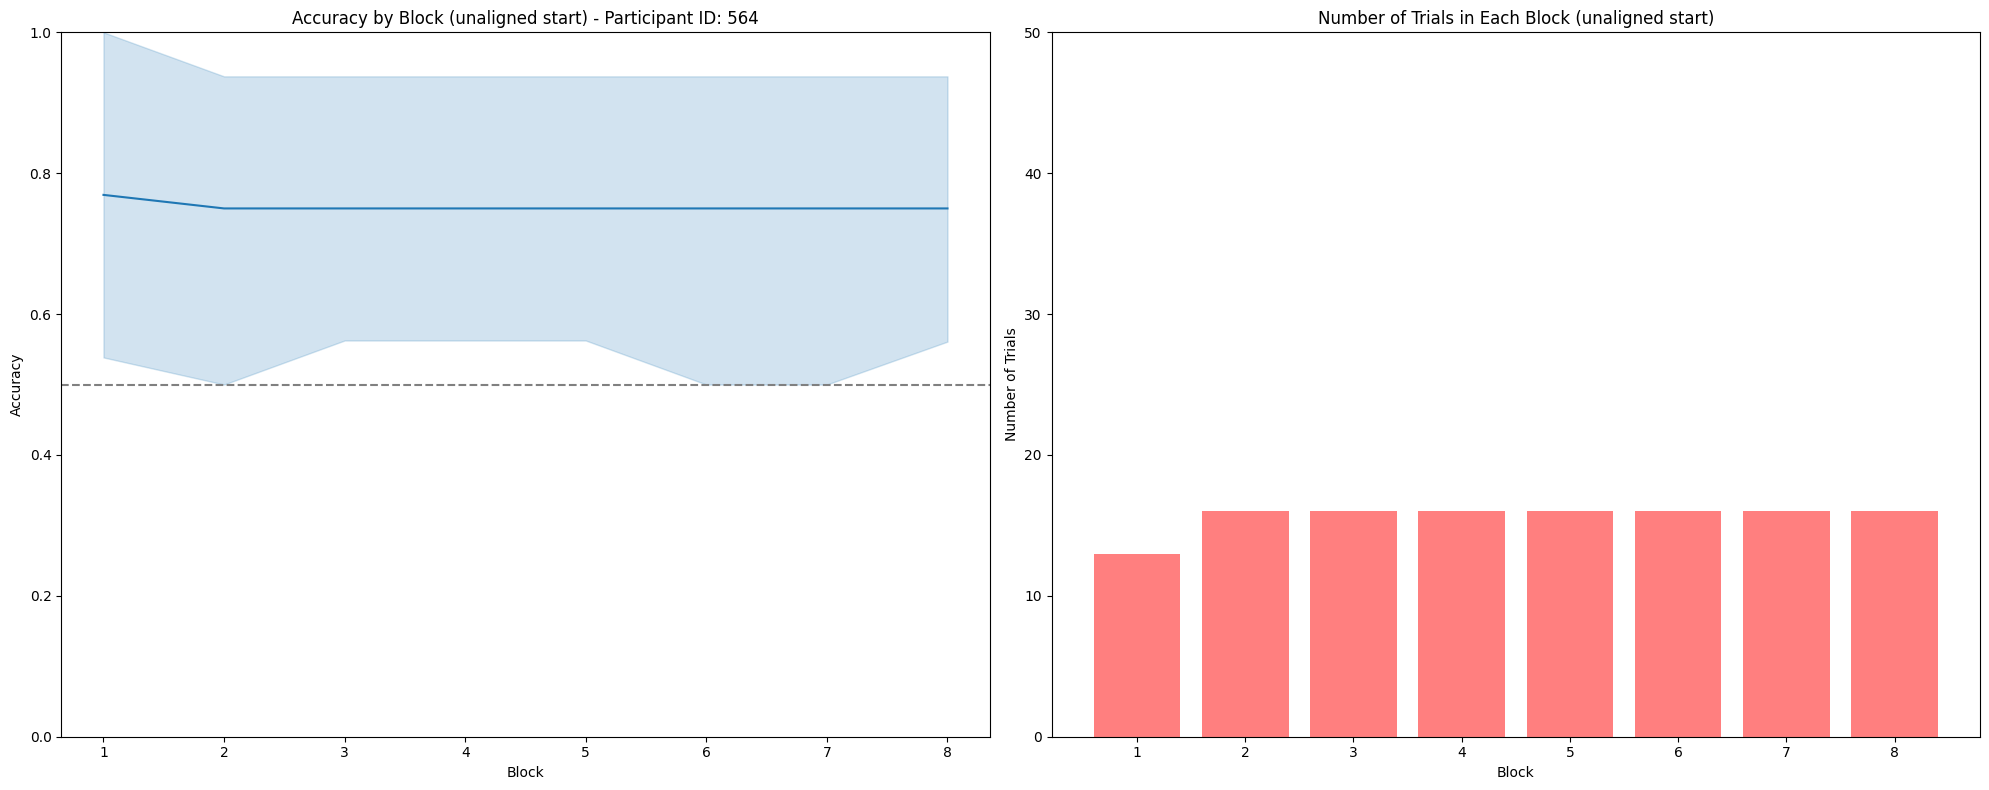

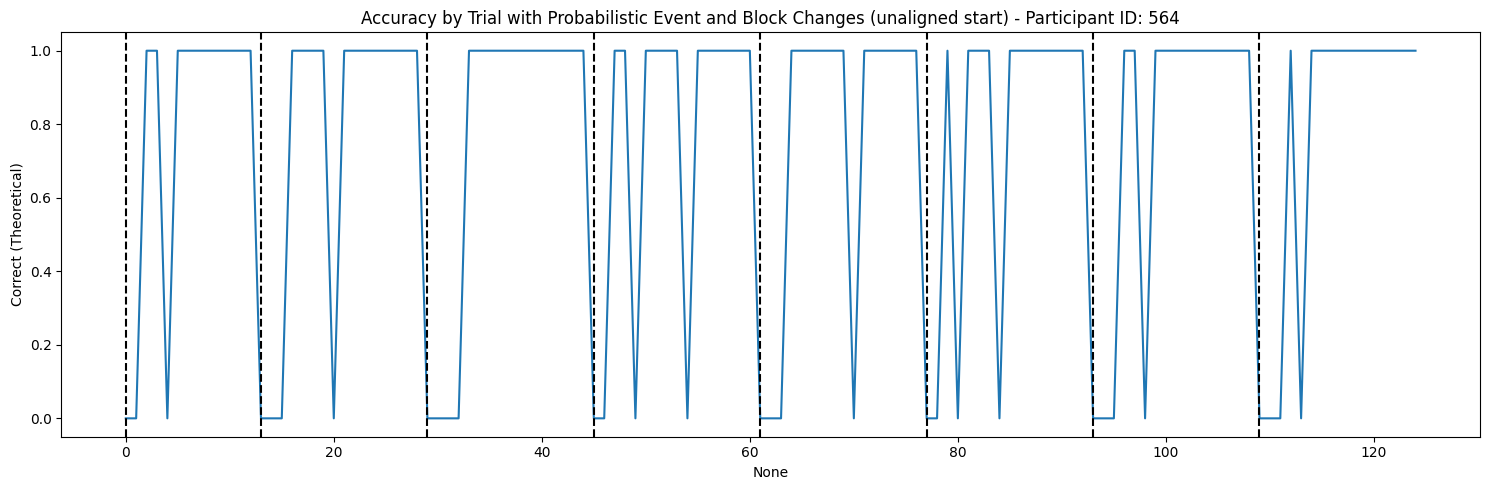

<Figure size 1200x800 with 0 Axes>

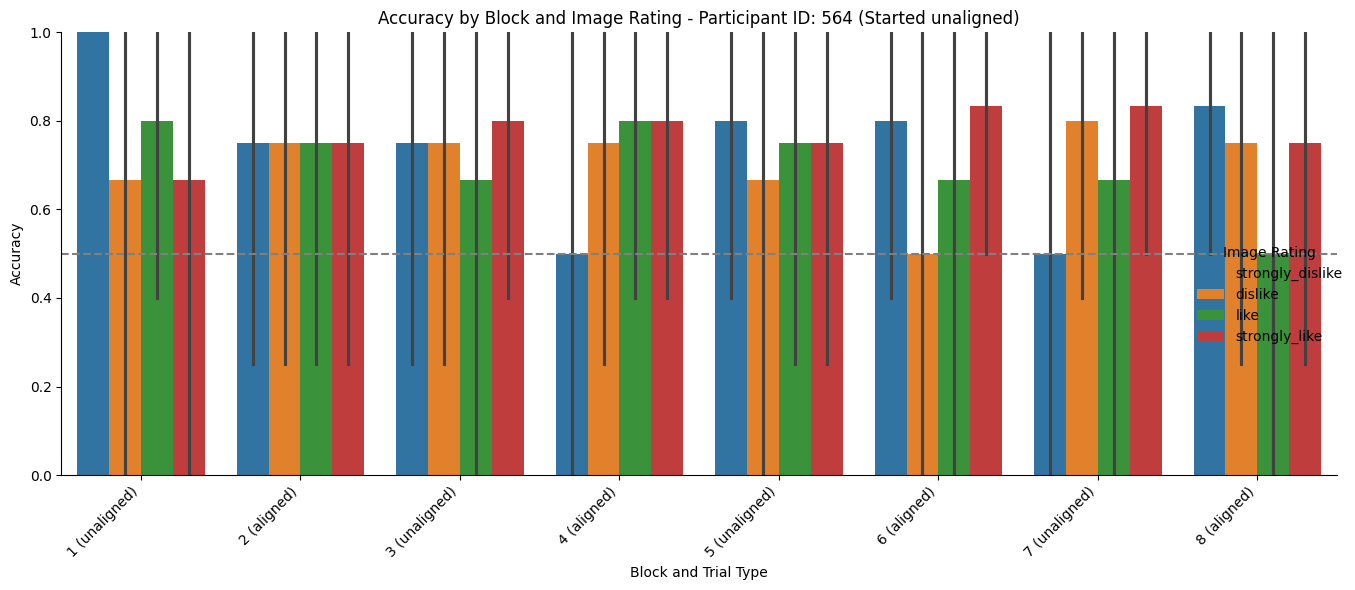

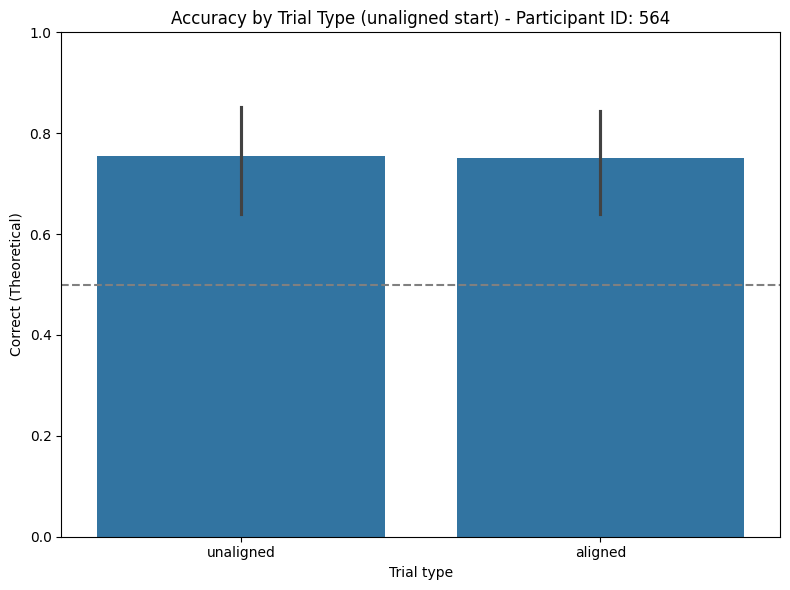

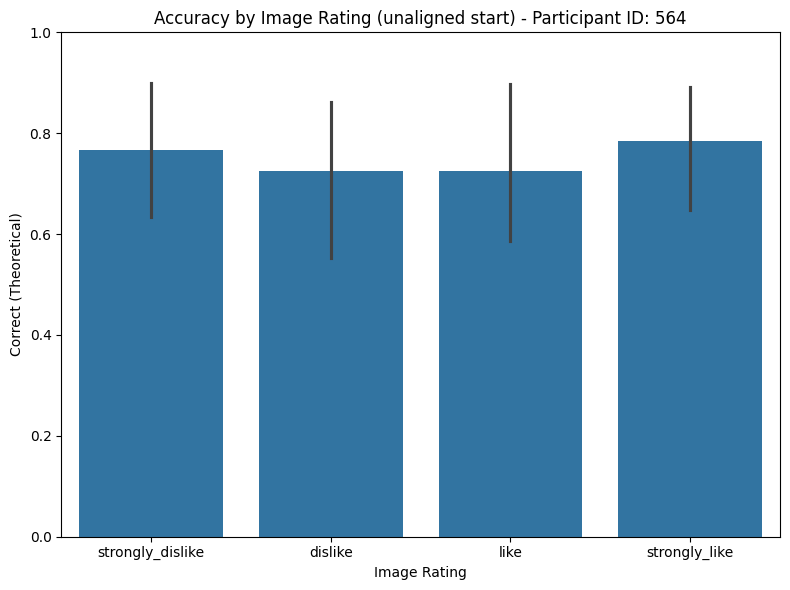

Participant ID: 564
Started with: unaligned
Number of trials in each 'Block':
Block
1    13
2    16
3    16
4    16
5    16
6    16
7    16
8    16
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.769231
2    0.750000
3    0.750000
4    0.750000
5    0.750000
6    0.750000
7    0.750000
8    0.750000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.750000
unaligned    0.754098
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.9581270878501309

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.769231
            2        0.750000
            3        0.750000
            4        0.750000
            5        0.750000
            6        0.750000
            7        0.750000
            8        0.750000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.766667
dislike         

<ipython-input-26-66869f9aeb51>:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


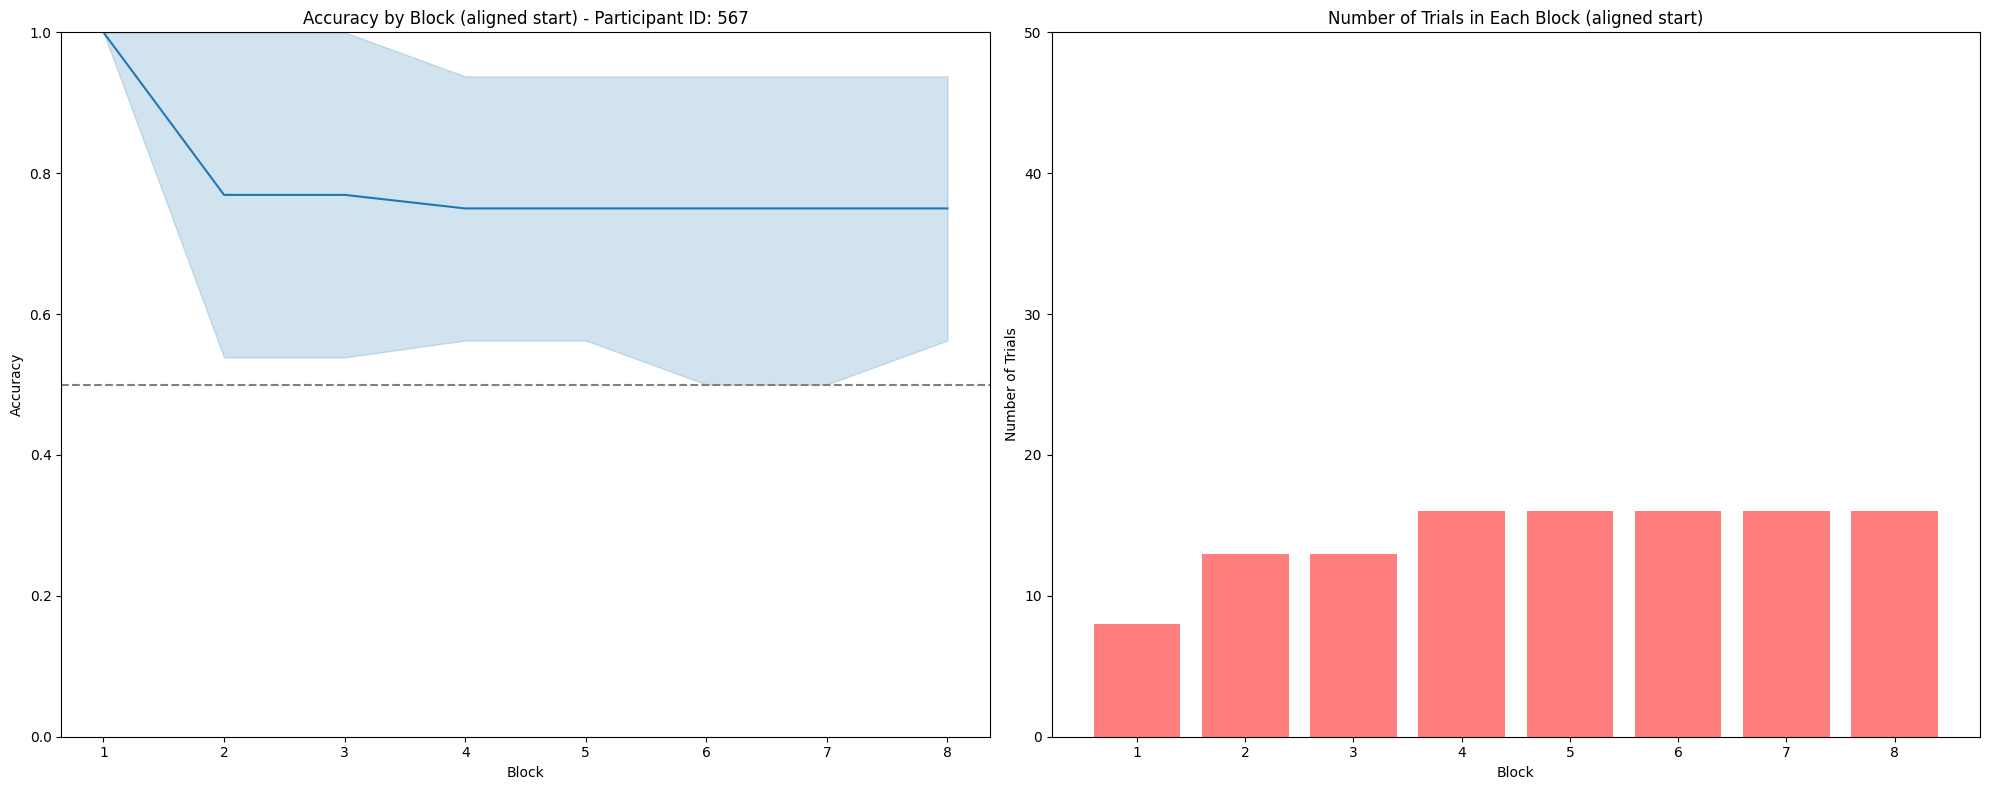

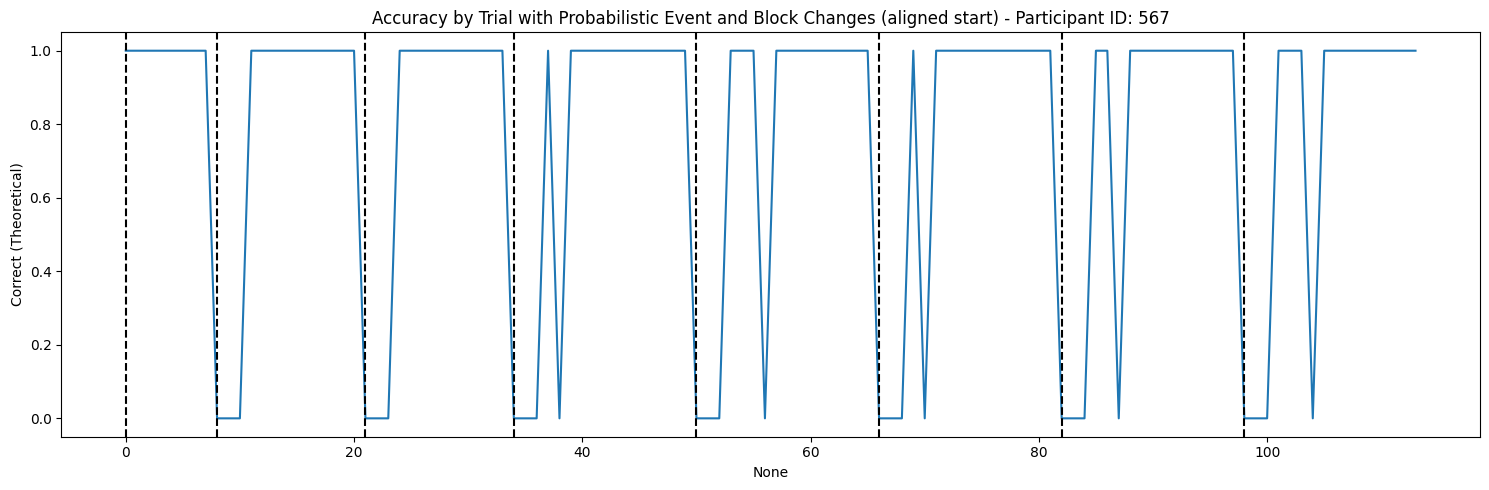

<Figure size 1200x800 with 0 Axes>

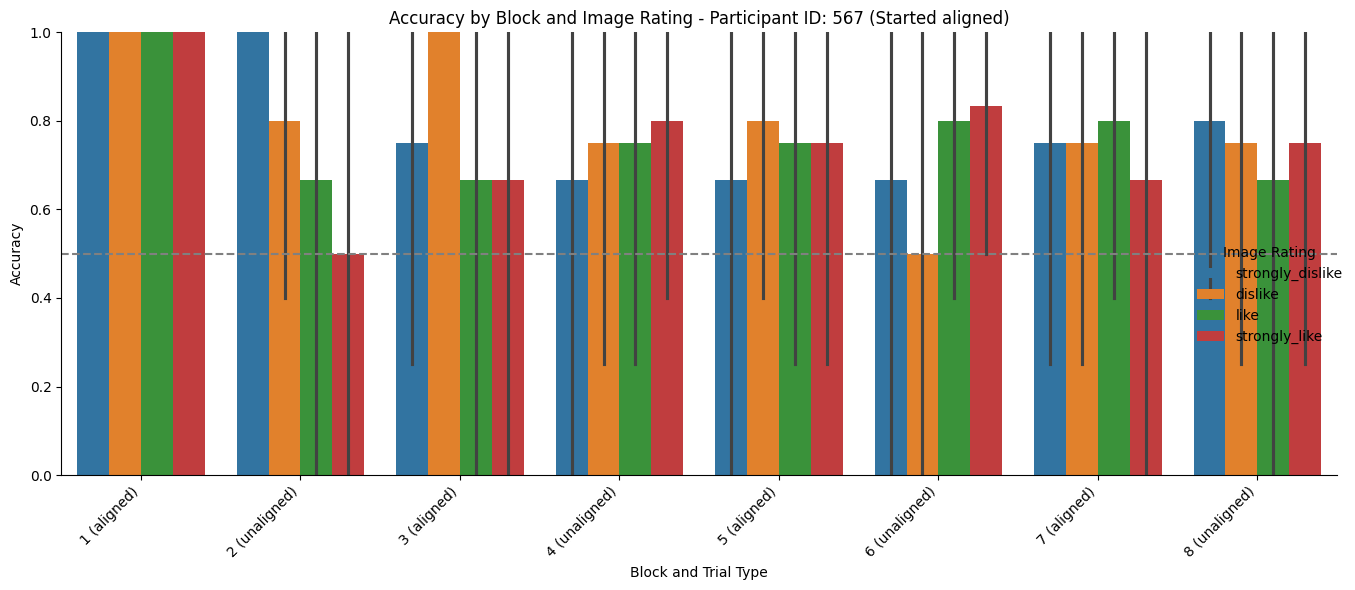

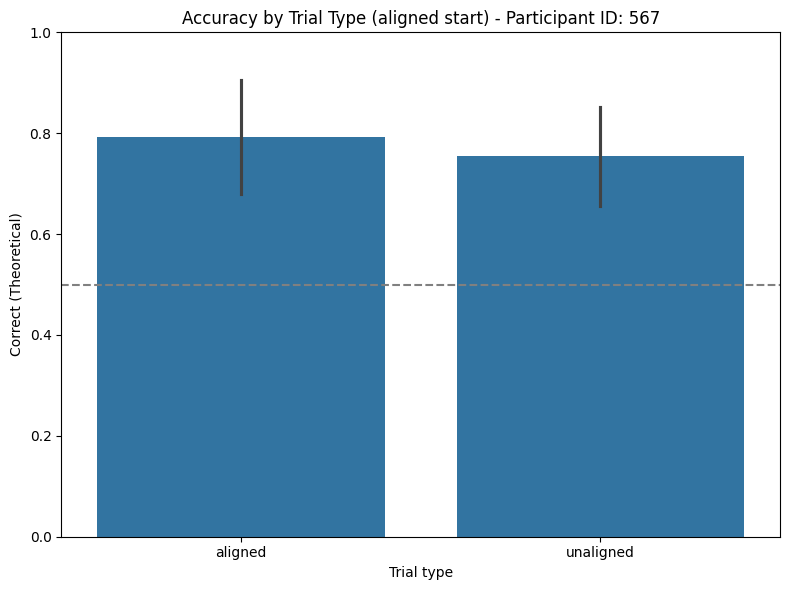

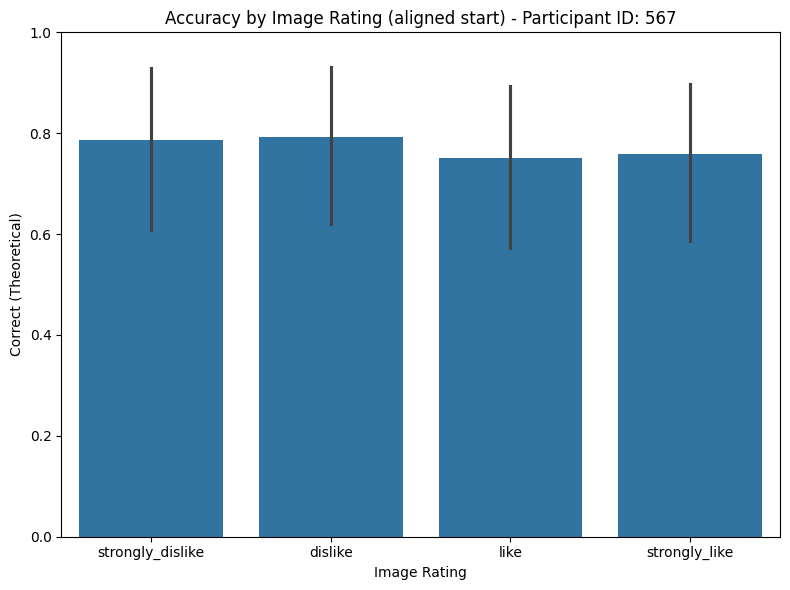

Participant ID: 567
Started with: aligned
Number of trials in each 'Block':
Block
1     8
2    13
3    13
4    16
5    16
6    16
7    16
8    16
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    1.000000
2    0.769231
3    0.769231
4    0.750000
5    0.750000
6    0.750000
7    0.750000
8    0.750000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.792453
unaligned    0.754098
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.6300349589787317

Accuracy over the whole task:
All Trials  Block
All Trials  1        1.000000
            2        0.769231
            3        0.769231
            4        0.750000
            5        0.750000
            6        0.750000
            7        0.750000
            8        0.750000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.785714
dislike           

<ipython-input-26-66869f9aeb51>:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Define the image rating order
rating_order = ['strongly_dislike', 'dislike', 'like', 'strongly_like']

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Determine the starting trial type (aligned or unaligned)
        starting_trial_type = df['Trial type'].iloc[0]

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()
        df['Block_Type'] = df['Block'].astype(str) + ' (' + df['Trial type'] + ')'

        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Ensure 'Image Rating' is in the specified order
        df['Image Rating'] = pd.Categorical(df['Image Rating'], categories=rating_order, ordered=True)

        # Number of trials in each 'Block'
        block_counts = df['Block'].value_counts().sort_index()

        # Accuracy in each 'Block'
        block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

        # Accuracy per 'Trial type' (aligned and unaligned)
        trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()
        ttest_p_value_tt = ttest_ind(df[df['Trial type'] == 'aligned']['Correct (Theoretical)'],
                                   df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'], nan_policy='omit').pvalue

        # Accuracy over the whole task
        df['Block Change'] = df['Block'].ne(df['Block'].shift())
        df['All Trials'] = 'All Trials'
        overall_accuracy = df.groupby(['All Trials', 'Block'])['Correct (Theoretical)'].mean()

        # Create a contingency table for chi-squared test
        contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Visualization

        # Plot Accuracy by Block and Number of Trials in each Block
        fig, axs = plt.subplots(1, 2, figsize=(20, 8))

        # Accuracy by Block
        sns.lineplot(x='Block', y='Correct (Theoretical)', data=df, ax=axs[0])
        axs[0].set_ylabel('Accuracy')
        axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
        axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
        axs[0].set_title(f'Accuracy by Block ({starting_trial_type} start) - Participant ID: {participant_id}')

        # Number of Trials in Each Block
        axs[1].bar(block_counts.index, block_counts, color='r', alpha=0.5)
        axs[1].set_ylabel('Number of Trials')
        axs[1].set_xlabel('Block')
        axs[1].set_ylim(0, 50)  # Set y-axis limits to 0-50
        axs[1].set_title(f'Number of Trials in Each Block ({starting_trial_type} start)')

        plt.tight_layout()
        plt.show()

        # Accuracy by Trial with Probabilistic Event and Block Changes
        plt.figure(figsize=(15, 5))
        sns.lineplot(x=df.index, y='Correct (Theoretical)', data=df)
        for i, event in enumerate(df['Probabilistic event']):
            if event:
                plt.plot(i, df.loc[i, 'Correct (Theoretical)'], 'ro')
        for i, change in enumerate(df['Block Change']):
            if change:
                plt.axvline(x=i, linestyle='--', color='k')
        plt.title(f'Accuracy by Trial with Probabilistic Event and Block Changes ({starting_trial_type} start) - Participant ID: {participant_id}')
        plt.tight_layout()
        plt.show()

        # Accuracy by Block and Image Rating
        plt.figure(figsize=(12, 8))
        sns.catplot(
            data=df,
            x='Block_Type',
            y='Correct (Binary)',
            hue='Image Rating',
            hue_order=rating_order,
            kind='bar',
            height=6,
            aspect=2,
            legend_out=True
        )
        plt.title(f'Accuracy by Block and Image Rating - Participant ID: {participant_id} (Started {starting_trial_type})')
        plt.axhline(y=0.5, color='gray', linestyle='--', label='Chance Level')
        plt.ylim(0, 1)  # Set y-axis limits to 0-1
        plt.xlabel('Block and Trial Type')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()

        # Accuracy by Trial Type
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Trial type', y='Correct (Theoretical)', data=df)
        plt.title(f'Accuracy by Trial Type ({starting_trial_type} start) - Participant ID: {participant_id}')
        if ttest_p_value_tt < 0.05:
            height = max(df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
            plt.plot([0, 1], [height, height], linewidth=1, color='k')
            plt.text(0.5, height + 0.01, f'p={ttest_p_value_tt:.3f}', ha='center', va='bottom')
        plt.ylim(0, 1)
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.tight_layout()
        plt.show()

        # Accuracy by Image Rating
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=df)
        plt.title(f'Accuracy by Image Rating ({starting_trial_type} start) - Participant ID: {participant_id}')
        if p < 0.05:
            height = max(df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
            plt.plot(range(len(rating_order)), [height] * len(rating_order), linewidth=1, color='k')
            plt.text(len(rating_order) // 2, height + 0.01, f'p={p:.3f}', ha='center', va='bottom')
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

        # Output results
        print(f"Participant ID: {participant_id}")
        print(f"Started with: {starting_trial_type}")
        print("Number of trials in each 'Block':")
        print(block_counts)
        print("\nAccuracy in each 'Block':")
        print(block_accuracy)
        print("\nAccuracy per 'Trial type' (aligned and unaligned):")
        print(trial_type_accuracy)
        print(f"t-test p-value for 'Trial type': {ttest_p_value_tt}")
        print("\nAccuracy over the whole task:")
        print(overall_accuracy)
        print("\nAccuracy as a function of 'Image Rating':")
        print(df.groupby('Image Rating')['Correct (Binary)'].mean())
        print(f"Chi-squared p-value for 'Image Rating': {p:.15f}")
        print("Data for Chi-squared test:")
        print(contingency_table)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

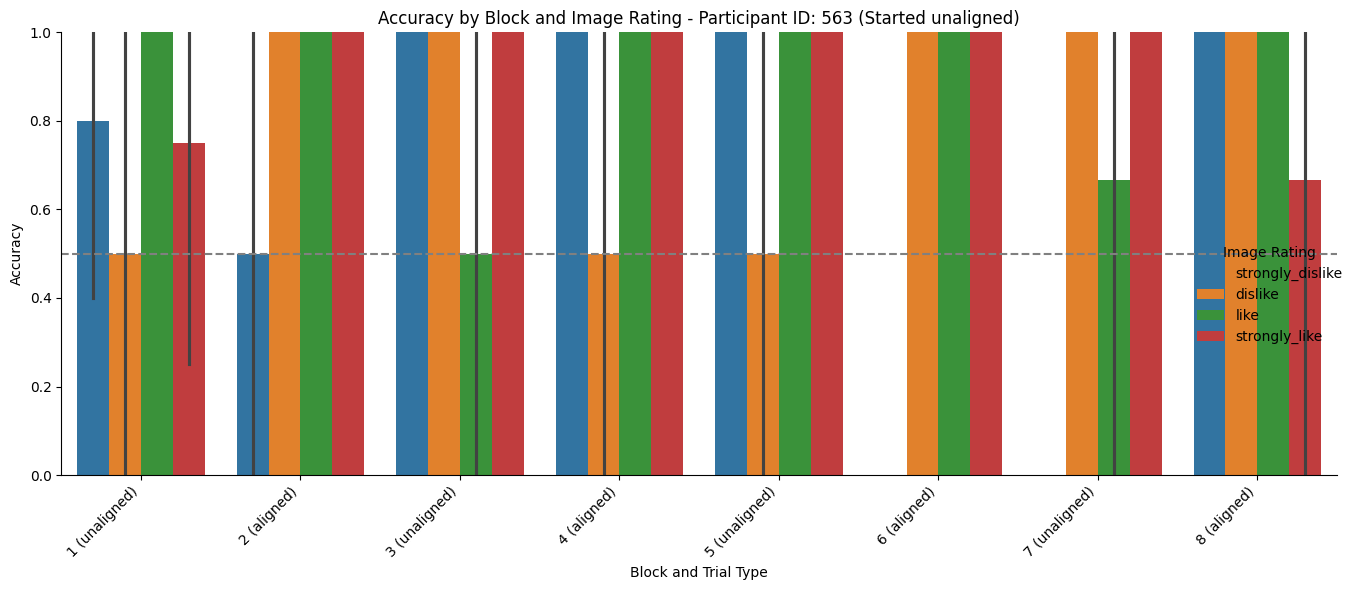

<Figure size 1200x800 with 0 Axes>

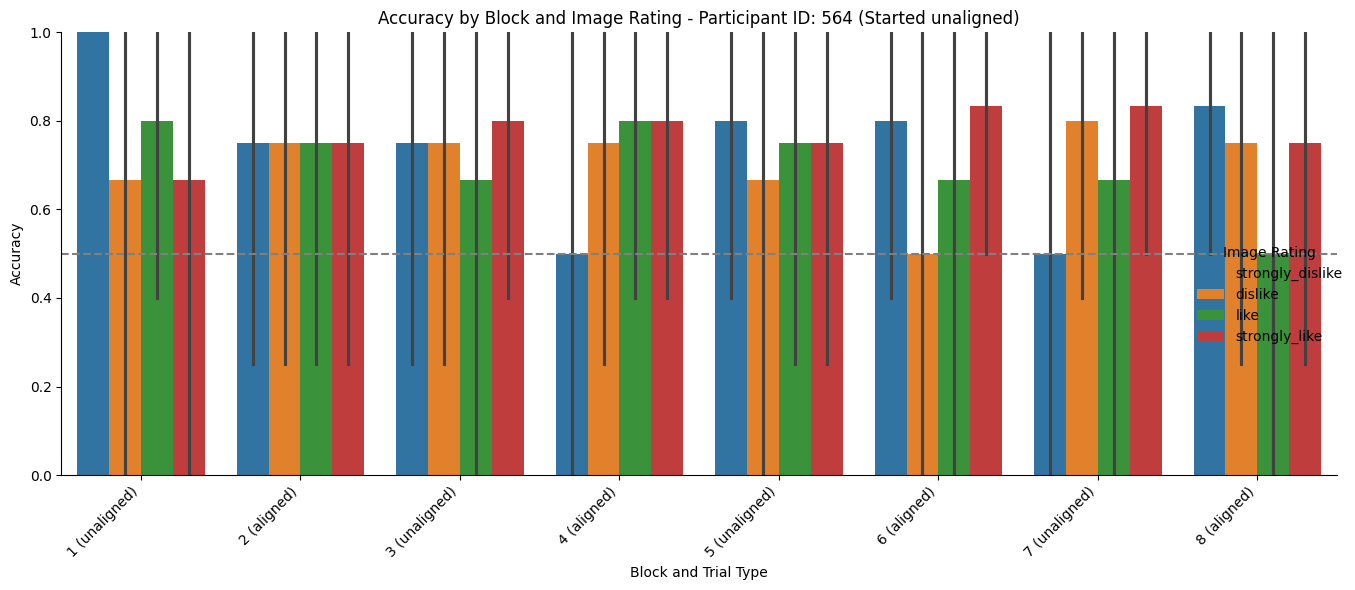

<Figure size 1200x800 with 0 Axes>

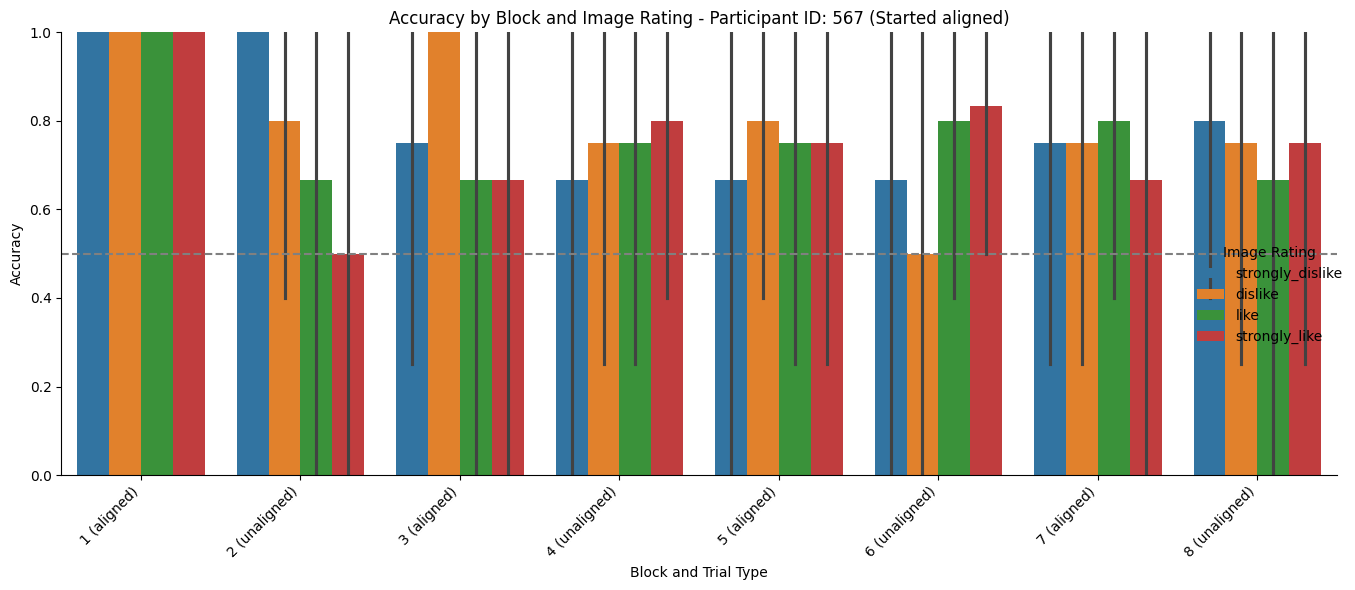

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the image rating order
rating_order = ['strongly_dislike', 'dislike', 'like', 'strongly_like']

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Determine the starting trial type (aligned or unaligned)
        starting_trial_type = df['Trial type'].iloc[0]

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Create a column that combines Block and Trial type
        df['Block_Type'] = df['Block'].astype(str) + ' (' + df['Trial type'] + ')'

        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Ensure 'Image Rating' is in the specified order
        df['Image Rating'] = pd.Categorical(df['Image Rating'], categories=rating_order, ordered=True)

        # Plot Accuracy by Block and Image Rating
        plt.figure(figsize=(12, 8))

        sns.catplot(
            data=df,
            x='Block_Type',
            y='Correct (Binary)',
            hue='Image Rating',
            hue_order=rating_order,  # Specify the order of the hue categories
            kind='bar',
            height=6,
            aspect=2,
            legend_out=True
        )

        plt.title(f'Accuracy by Block and Image Rating - Participant ID: {participant_id} (Started {starting_trial_type})')
        plt.axhline(y=0.5, color='gray', linestyle='--', label='Chance Level')  # Add a dotted line at y=0.5
        plt.ylim(0, 1)  # Set y-axis limits to 0-1
        plt.xlabel('Block and Trial Type')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()


# Across participants


## Average number of trials per block (separated by U & A starts) and average accuracy time course (separated by U & A start)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

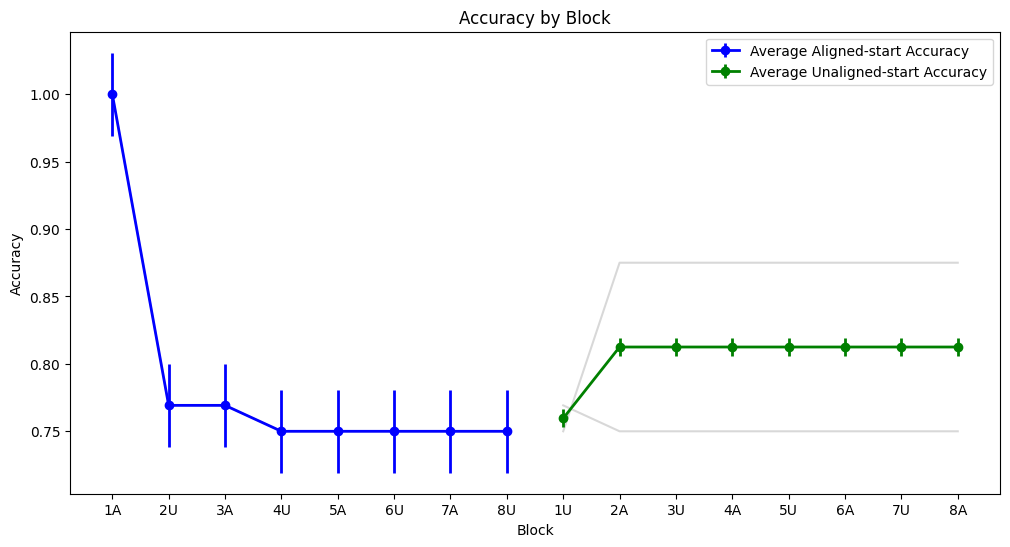

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Initialize empty lists to store aggregated data
all_block_counts = []
all_block_accuracy = []
all_trial_type_accuracy = []
all_ttest_p_values_tt = []
all_overall_accuracy = []
all_image_rating_data = []
all_chi2_p_values = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Define blocks based on switches in 'Trial type'
        df['Block Number'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()
        df['Block'] = df['Block Number'].astype(str) + df['Trial type'].apply(lambda x: 'A' if x == 'aligned' else 'U')

        # Number of trials in each 'Block'
        block_counts = df['Block'].value_counts()

        # Accuracy in each 'Block'
        block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

        # Accuracy per 'Trial type' (aligned and unaligned)
        trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()
        ttest_p_value_tt = ttest_ind(df[df['Trial type'] == 'aligned']['Correct (Theoretical)'],
                                     df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'], nan_policy='omit').pvalue

        # Accuracy over the whole task
        overall_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

        # Accuracy as a function of 'Image Rating'
        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Create a contingency table
        contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Append data to lists
        all_block_counts.append(block_counts)
        all_block_accuracy.append(block_accuracy)
        all_trial_type_accuracy.append(trial_type_accuracy)
        all_ttest_p_values_tt.append(ttest_p_value_tt)
        all_overall_accuracy.append(overall_accuracy)
        all_image_rating_data.append(df.groupby('Image Rating')['Correct (Theoretical)'].mean())
        all_chi2_p_values.append(p)

# Plotting across participants

# Accuracy by Block with Error 'Cloud' for Average Accuracy for Aligned and Unaligned Starts
plt.figure(figsize=(12, 6))

# Separate data for 'Aligned' and 'Unaligned' starts
aligned_data = [block_accuracy for block_accuracy in all_block_accuracy if 'A' in block_accuracy.index[0]]
unaligned_data = [block_accuracy for block_accuracy in all_block_accuracy if 'U' in block_accuracy.index[0]]

# Plot individual accuracies (faint grey lines) and average lines with error 'cloud'
for block_accuracy in aligned_data:
    plt.plot(block_accuracy.index, block_accuracy, color='grey', alpha=0.3)  # Faint grey lines for individual accuracies
avg_aligned_accuracy = pd.concat(aligned_data, axis=1).mean(axis=1)
plt.errorbar(avg_aligned_accuracy.index, avg_aligned_accuracy, yerr=avg_aligned_accuracy.sem(), fmt='-o', color='blue', lw=2, label='Average Aligned-start Accuracy')

for block_accuracy in unaligned_data:
    plt.plot(block_accuracy.index, block_accuracy, color='grey', alpha=0.3)  # Faint grey lines for individual accuracies
avg_unaligned_accuracy = pd.concat(unaligned_data, axis=1).mean(axis=1)
plt.errorbar(avg_unaligned_accuracy.index, avg_unaligned_accuracy, yerr=avg_unaligned_accuracy.sem(), fmt='-o', color='green', lw=2, label='Average Unaligned-start Accuracy')

plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy by Block')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

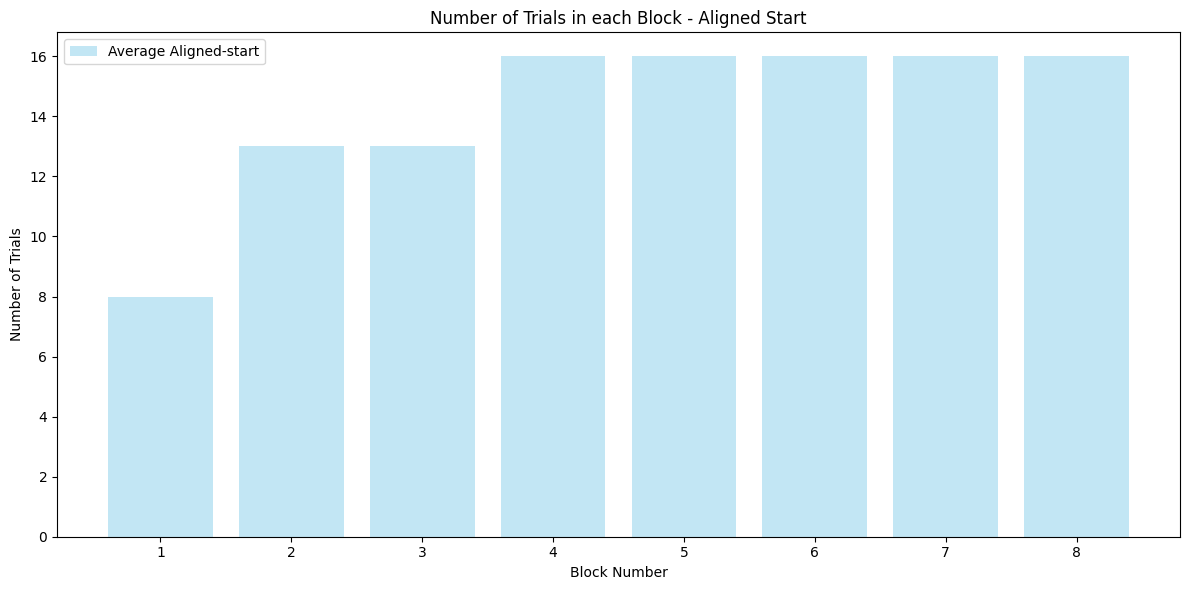

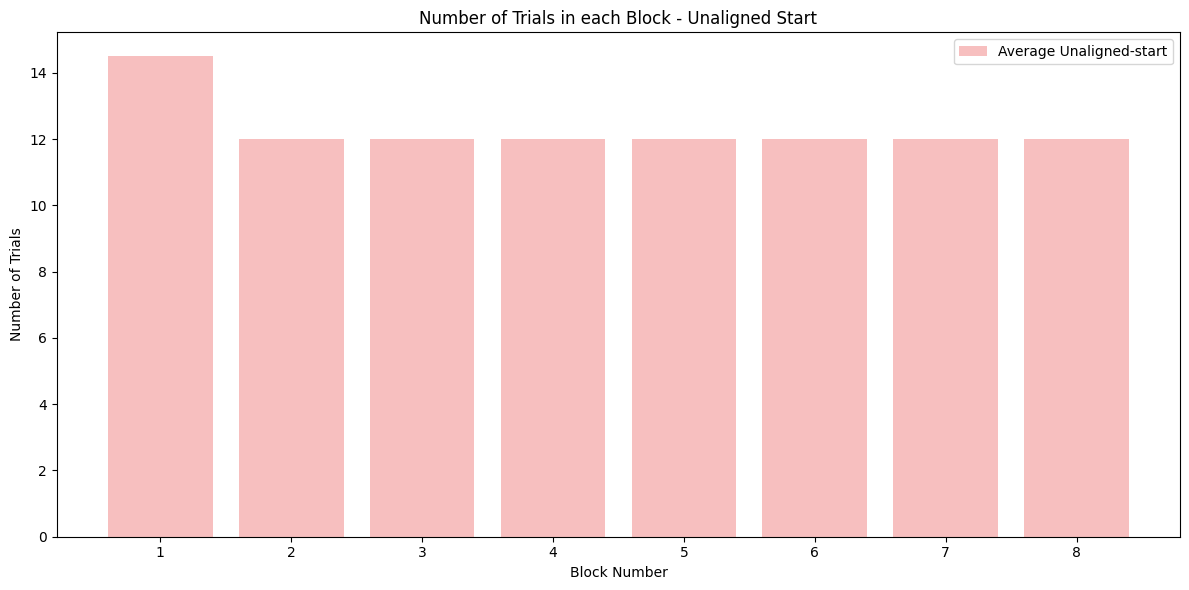

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize empty lists to store aggregated data
aligned_block_counts = []
unaligned_block_counts = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Define blocks based on switches in 'Trial type'
        df['Block Number'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Number of trials in each Block
        block_counts = df['Block Number'].value_counts().sort_index()

        # Separate out aligned and unaligned starts
        if df['Trial type'].iloc[0] == 'aligned':
            aligned_block_counts.append(block_counts)
        else:
            unaligned_block_counts.append(block_counts)

# Calculate the average number of trials in each block across participants for aligned starts
aligned_block_counts_df = pd.concat(aligned_block_counts, axis=1)
avg_aligned_block_counts = aligned_block_counts_df.mean(axis=1)

# Calculate the average number of trials in each block across participants for unaligned starts
unaligned_block_counts_df = pd.concat(unaligned_block_counts, axis=1)
avg_unaligned_block_counts = unaligned_block_counts_df.mean(axis=1)

# Plotting the number of trials in each Block, separated by Unaligned and Aligned starts

# Plot for aligned starts
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(avg_aligned_block_counts) + 1), avg_aligned_block_counts, color='skyblue', alpha=0.5, label='Average Aligned-start')

plt.xlabel('Block Number')
plt.ylabel('Number of Trials')
plt.xticks(range(1, len(avg_aligned_block_counts) + 1), range(1, len(avg_aligned_block_counts) + 1))
plt.title('Number of Trials in each Block - Aligned Start')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for unaligned starts
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(avg_unaligned_block_counts) + 1), avg_unaligned_block_counts, color='lightcoral', alpha=0.5, label='Average Unaligned-start')

plt.xlabel('Block Number')
plt.ylabel('Number of Trials')
plt.xticks(range(1, len(avg_unaligned_block_counts) + 1), range(1, len(avg_unaligned_block_counts) + 1))
plt.title('Number of Trials in each Block - Unaligned Start')
plt.legend()
plt.tight_layout()
plt.show()


## Average accuracy within a block (by block type)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Columns in the DataFrame: Index(['Image', 'Image Rating', 'Expectation', 'Outcome', 'Response Time',
       'Jitter 1', 'Jitter 2', 'Correct', 'Correct (Theoretical)',
       'Probabilistic event', 'Trial type', 'Block', 'Participant ID',
       'Trial Number'],
      dtype='object')


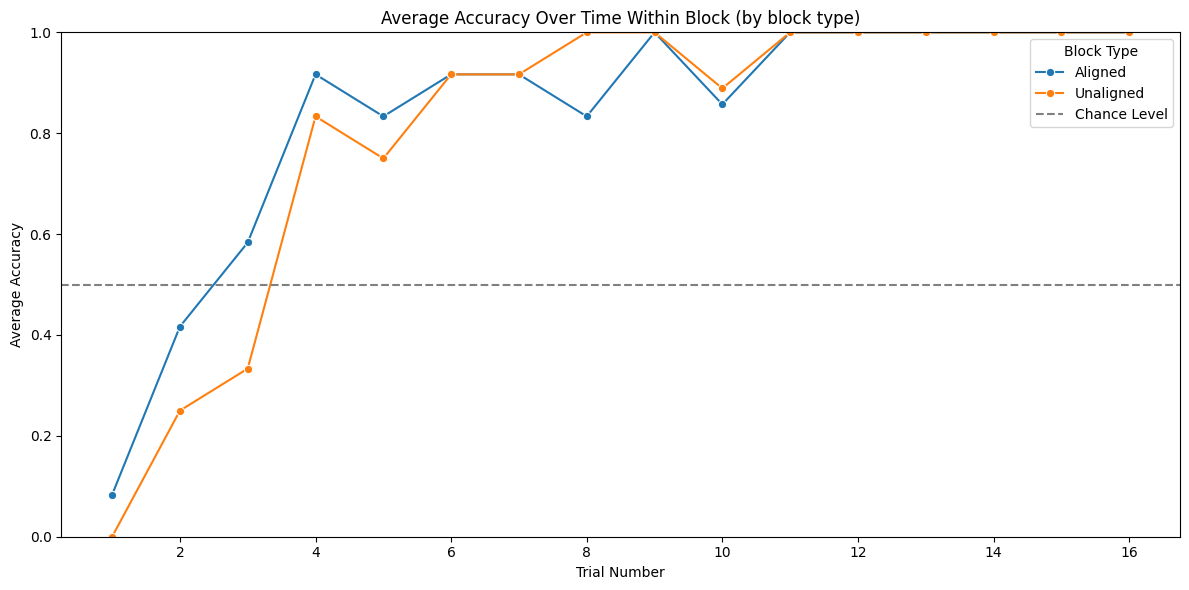

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store DataFrames
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Add cumulative trial number within each block
        df['Trial Number'] = df.groupby('Block').cumcount() + 1

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Check columns for sanity
print("Columns in the DataFrame:", all_data_df.columns)

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_data_df['Correct (Binary)'] = all_data_df['Correct (Theoretical)'].astype(int)

# Convert 'Block' to string and create a column to represent the type of block (Aligned/Unaligned)
all_data_df['Block'] = all_data_df['Block'].astype(str)
all_data_df['Block Type'] = all_data_df['Trial type'].apply(lambda x: 'Aligned' if x == 'aligned' else 'Unaligned')

# Calculate overall average accuracy per trial across all participants
overall_avg = all_data_df.groupby(['Block Type', 'Trial Number'])['Correct (Theoretical)'].mean().reset_index()

# Plot overall average accuracy per trial
plt.figure(figsize=(12, 6))
sns.lineplot(x='Trial Number', y='Correct (Theoretical)', hue='Block Type', data=overall_avg, marker='o')
plt.title('Average Accuracy Over Time Within Block (by block type)')
plt.ylim(0, 1)
plt.axhline(0.5, linestyle='--', color='grey', label='Chance Level')
plt.xlabel('Trial Number')
plt.ylabel('Average Accuracy')
plt.legend(title='Block Type')
plt.tight_layout()
plt.show()


## Bar plots: Accuracy by trial type and by stimulus valence

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Accuracy per 'Trial type' (aligned and unaligned) (average across participants):
Trial type
aligned      0.791946
unaligned    0.771605
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants): 0.6658259616925464

Accuracy as a function of 'Image Rating' (average across participants):
Image Rating
dislike             0.760000
like                0.779221
strongly_dislike    0.783784
strongly_like       0.800000
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants): 0.944795347550505
Data for Chi-squared test (average across participants):
Correct (Binary)   0   1
Image Rating            
dislike           18  57
like              17  60
strongly_dislike  16  58
strongly_like     17  68


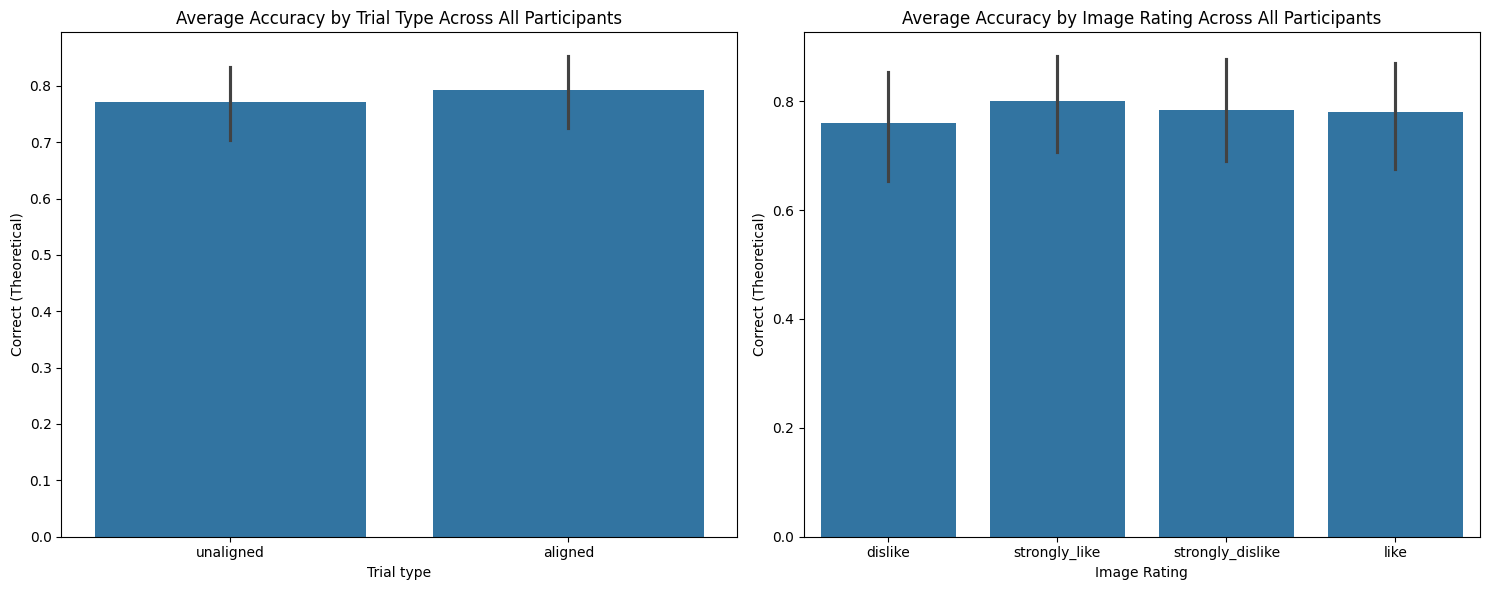

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

# Initialize lists to store data from each participant
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_data_df['Correct (Binary)'] = all_data_df['Correct (Theoretical)'].astype(int)


# Accuracy per 'Trial type' (aligned and unaligned)
trial_type_accuracy_all = all_data_df.groupby('Trial type')['Correct (Theoretical)'].mean()
ttest_p_value_tt_all = ttest_ind(
    all_data_df[all_data_df['Trial type'] == 'aligned']['Correct (Theoretical)'],
    all_data_df[all_data_df['Trial type'] == 'unaligned']['Correct (Theoretical)'],
    nan_policy='omit'
).pvalue


# Accuracy as a function of 'Image Rating'
# Create a contingency table
contingency_table_all = pd.crosstab(all_data_df['Image Rating'], all_data_df['Correct (Binary)'])

# Perform chi-squared test
chi2_all, p_all, _, _ = chi2_contingency(contingency_table_all)

# Output results

print("\nAccuracy per 'Trial type' (aligned and unaligned) (average across participants):")
print(trial_type_accuracy_all)
print(f"t-test p-value for 'Trial type' (average across participants): {ttest_p_value_tt_all}")

print("\nAccuracy as a function of 'Image Rating' (average across participants):")
print(all_data_df.groupby('Image Rating')['Correct (Binary)'].mean())
print(f"Chi-squared p-value for 'Image Rating' (average across participants): {p_all:.15f}")
print("Data for Chi-squared test (average across participants):")
print(contingency_table_all)

# Visualization

# Accuracy by Trial Type and Image Rating
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy by Trial Type
sns.barplot(x='Trial type', y='Correct (Theoretical)', data=all_data_df, ax=axs[0])
axs[0].set_title('Average Accuracy by Trial Type Across All Participants')
if ttest_p_value_tt_all < 0.05:
    height = max(all_data_df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
    axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
    axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt_all:.3f}', ha='center', va='bottom')

# Accuracy by Image Rating
sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=all_data_df, ax=axs[1])
axs[1].set_title('Average Accuracy by Image Rating Across All Participants')
if p_all < 0.05:
    height = max(all_data_df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
    axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
    axs[1].text(1.5, height + 0.01, f'p={p_all:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Accuracy per 'Trial type' (aligned and unaligned) (average across participants) - Aligned Start:
Trial type
aligned      0.792453
unaligned    0.754098
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants) - Aligned Start: 0.6300349589787317

Accuracy as a function of 'Image Rating' (average across participants) - Aligned Start:
Image Rating
dislike             0.793103
like                0.750000
strongly_dislike    0.785714
strongly_like       0.758621
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants) - Aligned Start: 0.976003124648392
Data for Chi-squared test (average across participants) - Aligned Start:
Correct (Binary)  0   1
Image Rating           
dislike           6  23
like              7  21
strongly_dislike  6  22
strongly_like     7  22


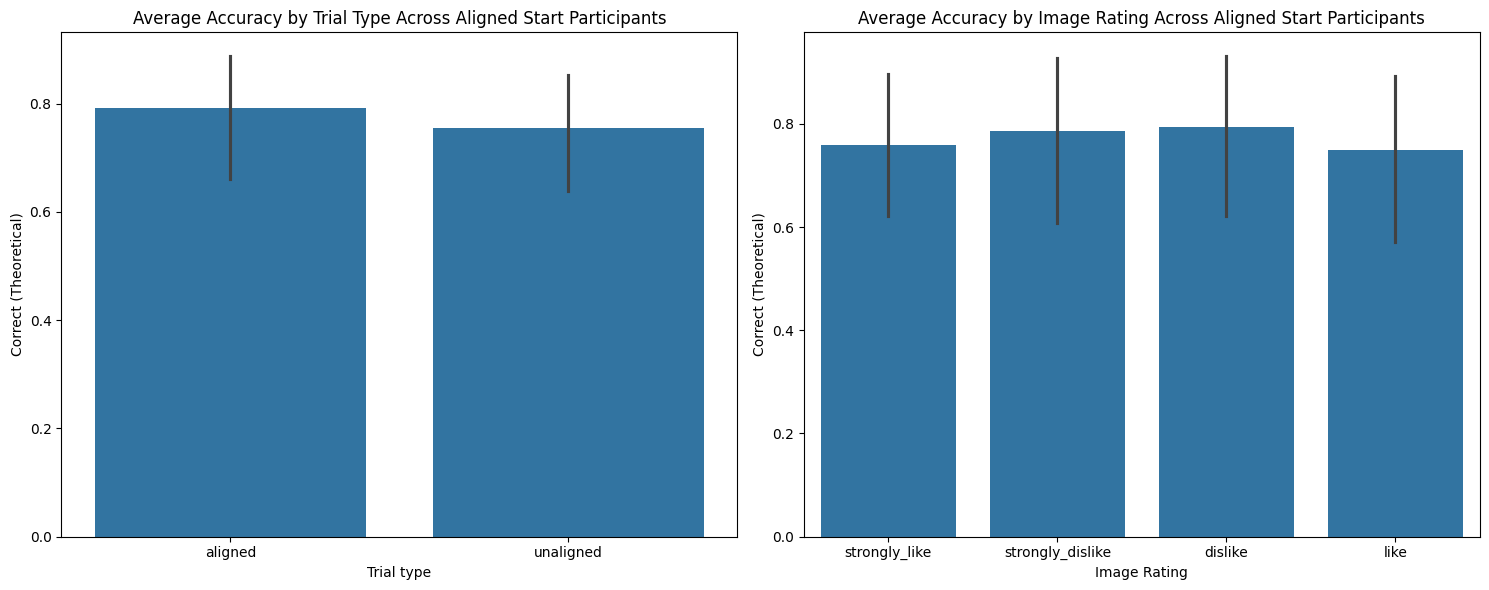


Accuracy per 'Trial type' (aligned and unaligned) (average across participants) - Unaligned Start:
Trial type
aligned      0.791667
unaligned    0.782178
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants) - Unaligned Start: 0.8716985602125498

Accuracy as a function of 'Image Rating' (average across participants) - Unaligned Start:
Image Rating
dislike             0.739130
like                0.795918
strongly_dislike    0.782609
strongly_like       0.821429
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants) - Unaligned Start: 0.788533273092104
Data for Chi-squared test (average across participants) - Unaligned Start:
Correct (Binary)   0   1
Image Rating            
dislike           12  34
like              10  39
strongly_dislike  10  36
strongly_like     10  46


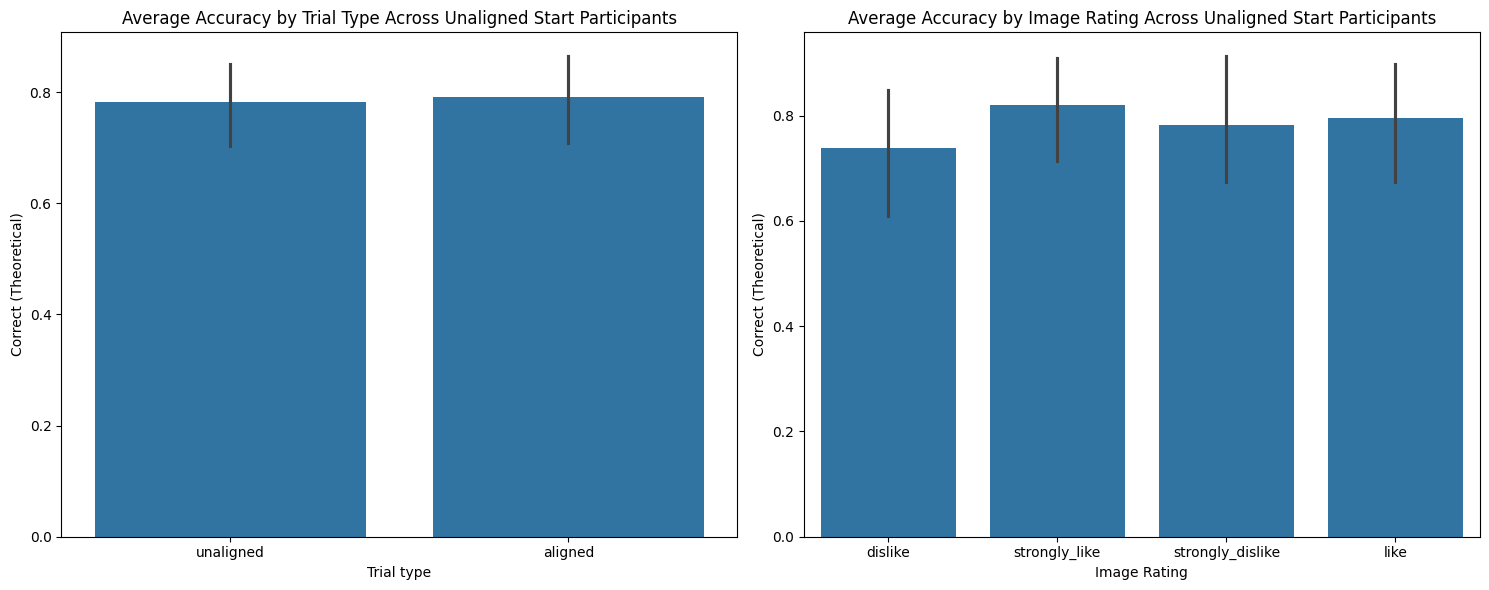

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

# Initialize lists to store data from each participant
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_data_df['Correct (Binary)'] = all_data_df['Correct (Theoretical)'].astype(int)

# Separate data based on the starting block type
aligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'aligned')
unaligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'unaligned')

# Function to perform analysis and plotting
def analyze_and_plot(data_df, title_suffix):
    # Accuracy per 'Trial type'
    trial_type_accuracy = data_df.groupby('Trial type')['Correct (Theoretical)'].mean()
    ttest_p_value_tt = ttest_ind(
        data_df[data_df['Trial type'] == 'aligned']['Correct (Theoretical)'],
        data_df[data_df['Trial type'] == 'unaligned']['Correct (Theoretical)'],
        nan_policy='omit'
    ).pvalue

    # Accuracy as a function of 'Image Rating'
    contingency_table = pd.crosstab(data_df['Image Rating'], data_df['Correct (Binary)'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Output results
    print(f"\nAccuracy per 'Trial type' (aligned and unaligned) (average across participants) - {title_suffix}:")
    print(trial_type_accuracy)
    print(f"t-test p-value for 'Trial type' (average across participants) - {title_suffix}: {ttest_p_value_tt}")

    print(f"\nAccuracy as a function of 'Image Rating' (average across participants) - {title_suffix}:")
    print(data_df.groupby('Image Rating')['Correct (Binary)'].mean())
    print(f"Chi-squared p-value for 'Image Rating' (average across participants) - {title_suffix}: {p:.15f}")
    print(f"Data for Chi-squared test (average across participants) - {title_suffix}:")
    print(contingency_table)

    # Visualization
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Accuracy by Trial Type
    sns.barplot(x='Trial type', y='Correct (Theoretical)', data=data_df, ax=axs[0])
    axs[0].set_title(f'Average Accuracy by Trial Type Across {title_suffix} Participants')
    if ttest_p_value_tt < 0.05:
        height = max(data_df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
        axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
        axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt:.3f}', ha='center', va='bottom')

    # Accuracy by Image Rating
    sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=data_df, ax=axs[1])
    axs[1].set_title(f'Average Accuracy by Image Rating Across {title_suffix} Participants')
    if p < 0.05:
        height = max(data_df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
        axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
        axs[1].text(1.5, height + 0.01, f'p={p:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Analyze and plot for aligned-start participants
analyze_and_plot(aligned_start_df, 'Aligned Start')

# Analyze and plot for unaligned-start participants
analyze_and_plot(unaligned_start_df, 'Unaligned Start')


<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

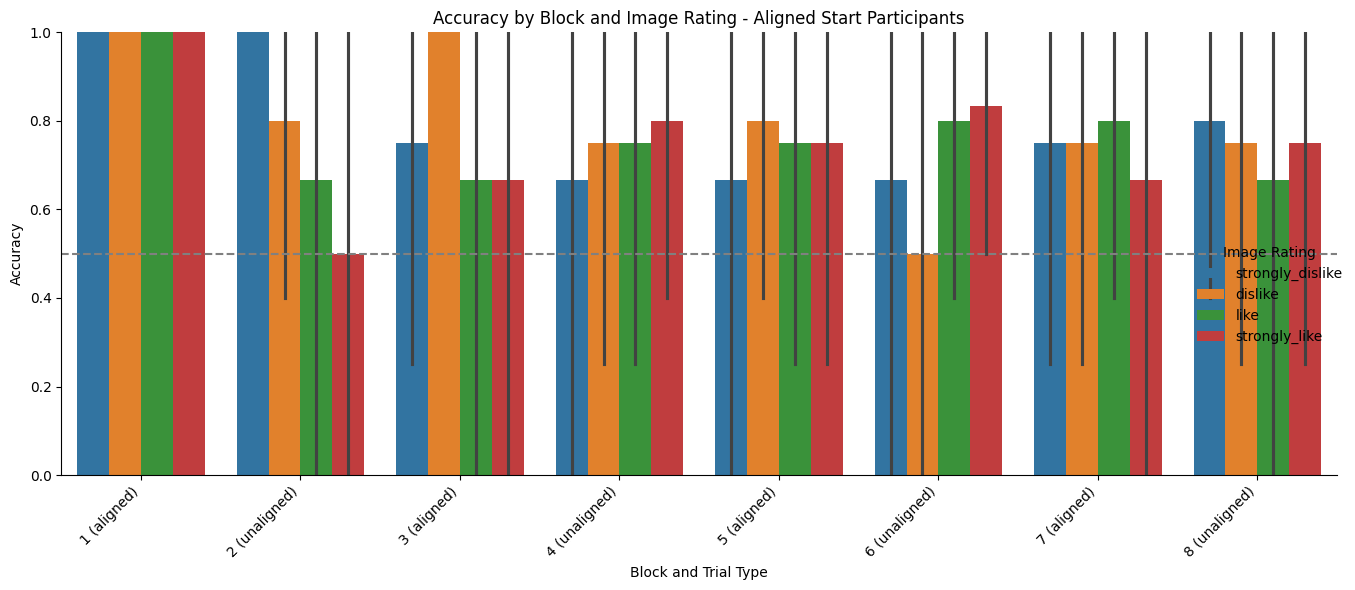

<Figure size 1200x800 with 0 Axes>

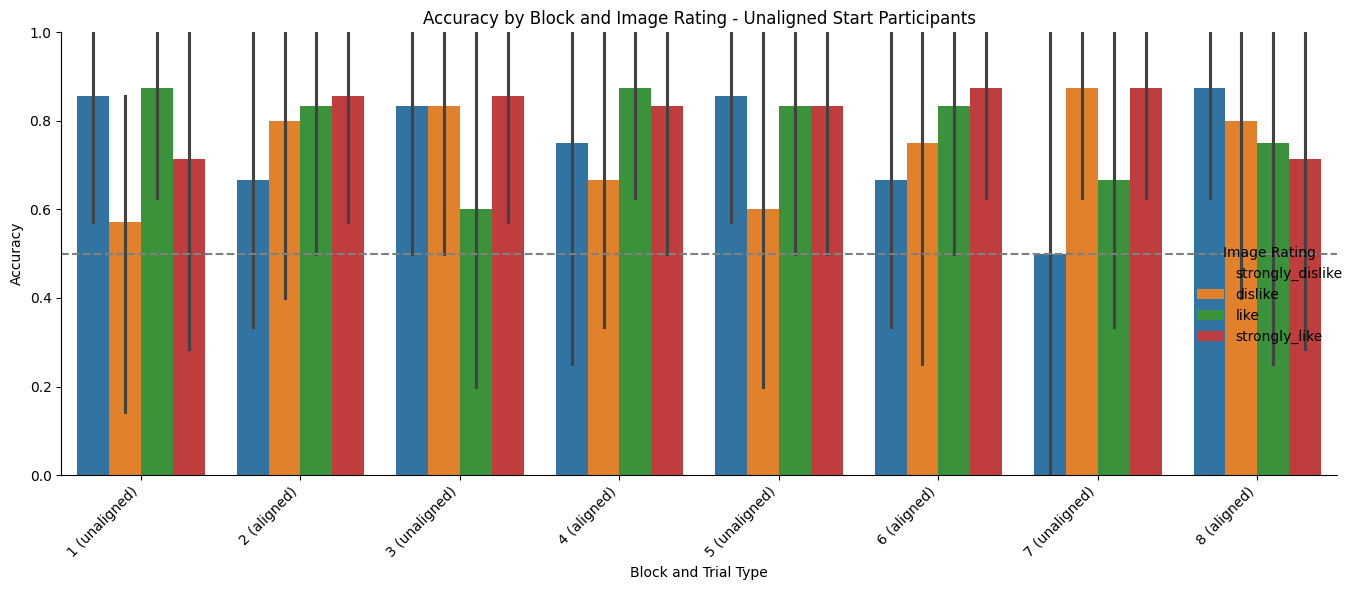

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store data from each participant
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Create a column that combines Block and Trial type
        df['Block_Type'] = df['Block'].astype(str) + ' (' + df['Trial type'] + ')'

        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Separate data based on the starting block type
aligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'aligned')
unaligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'unaligned')

# Define a function to plot accuracy by block and image rating for each group
def plot_accuracy_by_block_image_rating(data_df, title_suffix):
    # Ensure 'Image Rating' is in the specified order
    rating_order = ['strongly_dislike', 'dislike', 'like', 'strongly_like']
    data_df['Image Rating'] = pd.Categorical(data_df['Image Rating'], categories=rating_order, ordered=True)

    # Plot Accuracy by Block and Image Rating
    plt.figure(figsize=(12, 8))
    sns.catplot(
        data=data_df,
        x='Block_Type',
        y='Correct (Binary)',
        hue='Image Rating',
        hue_order=rating_order,  # Specify the order of the hue categories
        kind='bar',
        height=6,
        aspect=2,
        legend_out=True
    )

    plt.title(f'Accuracy by Block and Image Rating - {title_suffix} Participants')
    plt.axhline(y=0.5, color='gray', linestyle='--', label='Chance Level')  # Add a dotted line at y=0.5
    plt.ylim(0, 1)  # Set y-axis limits to 0-1
    plt.xlabel('Block and Trial Type')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plot for aligned-start participants
plot_accuracy_by_block_image_rating(aligned_start_df, 'Aligned Start')

# Plot for unaligned-start participants
plot_accuracy_by_block_image_rating(unaligned_start_df, 'Unaligned Start')
